# US Airline Satisfaction Mini Project 

In this Project, we would like to peform some analysis on a dataset of __[US Airline passenger satisfaction survey](https://www.kaggle.com/datasets/najibmh/us-airline-passenger-satisfaction-survey?resource=download)__.

## Contents
- [Problem](#problem)
- [Data Preparation](#data-preparation)
- [Exploratory Analysis](#exploratory-analysis)
- [Models](#models)


---

<a id="problem"></a>
## Problem
Based on passenger ratings, we would like to find out how the different indivudal ratings affect the passenger's final decision for a _satisfied_ or _unsatisfied_ with the service provided by US Airline.

**Specifically**:
1. Can we predict if customer would be satified?
1. What are the most important factors that affect customer satisfaction?

---

<a id="data-preparation"></a>
## Data Preparation

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [4]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics

### Import the Dataset
Source: __[US Airline passenger satisfaction survey](https://www.kaggle.com/datasets/najibmh/us-airline-passenger-satisfaction-survey?resource=download)__

Attached file: `satisfaction_v2.csv`  

In [5]:
satisfactionData = pd.read_csv('satisfaction.csv')
satisfactionData.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
satisfactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

#### Initial Observations
* There are `24` columns and `129880` rows in the dataset.   
* The response variable seems to be `satisfaction_v2`.
* There is `1` column for ID
* The remaining `22` columns are potential predictor variables.

#### Predictor Variables
* There are `16` variables identified as `int64` by default. But it seems like only `Flight Distance` and `Departure Delay in Minutes` are actually numeric. The remaining `14` variables are ratings from 0 to 5 and should be considered as Categorical.
* The `Arrivial Delay in Minutes` variable identified as `float64` by default, and it seems to be Numeric.
* The`Class` `Gender` `Customer Type` `Type of Travel` variable identified as `object` by default, and are most likely Categorical.  
* We noted that `Arrivial Delay in Minutes` seems to be missing some values.

### Dataset Cleaning

<div class="alert alert-block alert-info">
    <b>Missing Values: </b> It's noted that <code>Arrivial Delay in Minutes</code> has count <code>129487</code> instead of <code>129880</code>. This is due to it containing <code>NULL</code> values. We will replace them with <code>0</code> here.
</div>

In [4]:
# Check count
satisfactionData['Arrival Delay in Minutes'].count()

129487

In [6]:
satisfactionData['Arrival Delay in Minutes'].fillna(value=0, inplace=True)
# Check count
satisfactionData['Arrival Delay in Minutes'].count()

129880

<div class="alert alert-block alert-info">
    Check that the <code>id</code>s are unique. 
</div>

In [6]:
len(satisfactionData["id"].unique())

129880

<div class="alert alert-block alert-info">
    <b>Ordinal Categorical Variables</b><br>
    Most ordinal categorical variables are rating types in the <code>int</code> form. No conversion required. <br>
    But we will convert for <code>non-int</code> types <code>Class</code> and <code>Customer Type</code> in 
    <a href="#exploratory-analysis">Exploratory Analysis</a>
</div>

---
<a id="exploratory-analysis"></a>
## Exploratory Analysis

### Response Variable
Lets take a look at the response variable `satisfaction_v2`.

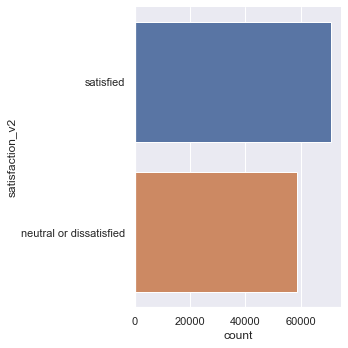

In [7]:
sb.catplot(y = 'satisfaction_v2', data = satisfactionData, kind = "count")

In [8]:
countG, countB = satisfactionData['satisfaction_v2'].value_counts()
print("[satisfied] : [neutral/dissatisfied] = [", countG, "] : [", countB, "]")

[satisfied] : [neutral/dissatisfied] = [ 71087 ] : [ 58793 ]


<div class="alert alert-block alert-info">
    The <code>satisfied</code> to <code>neutral/dissatisfied</code> ratio of <code> 71087 : 58794 </code> is acceptable. We will not perform any rebalancing for now.
</div>

### Predictor Variables
Lets take a look at the `22` predictor variables.<br>
We shall split them into the following subcategories.

* Passenger: variables relating to the passenger.
* Service: variables corresponding to the services provided by the airline.
* Others: variables that are do not fall in the above categories.

In [9]:
satisfactionData.iloc[:,6:24].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Class                              129880 non-null  object 
 1   Flight Distance                    129880 non-null  int64  
 2   Seat comfort                       129880 non-null  int64  
 3   Departure/Arrival time convenient  129880 non-null  int64  
 4   Food and drink                     129880 non-null  int64  
 5   Gate location                      129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Inflight entertainment             129880 non-null  int64  
 8   Online support                     129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  On-board service                   129880 non-null  int64  
 11  Leg room service                   1298

<a id="passenger-variables-ea"></a>
#### Passenger Variables
Variables relating to the passenger. <br>
**Categorical** : 
[`Class`](#class-ea)
[`Type of Travel`](#type-of-travel-ea)
[`Customer Type`](#customer-type-ea)
[`Gender`](#gender-ea) <br>

**Numeric** : [`Age`](#age-ea) <br>

<a id="class-ea"></a>
<div class="alert alert-block alert-info">
    <b>Class (Categorical)</b><br>
    The class variable seems to describle the type of flight class the passenger was in.<br>
    Since this is normally choosen by the passenger, we labeled it under <b>Passenger Variables</b><br>
    <b>Values</b><br>
    We observed that there are 3 unique values for <code>Class</code> variable.<br>
    It seems like their ordinal values(ascending) are as follows:<br>
    1: <code>Eco</code> 2: <code>Eco Plus</code> 3: <code>Business</code><br> 
    We will convert them accordingly. <br>
    <b>Distribution</b><br>
    The most common value is <code>Business</code> which is followed closely by <code>Eco</code>.<br>    
    <code>Eco Plus</code> has the least distribution. <br>
    <b>Relation</b><br>
    <code>Business</code> class have the higest satisfied rate while passengers from <code>Eco</code> and
    <code>Eco Plus</code> have higher neutral/disatisfied ratings.
    <br><br><a href="#passenger-variables-ea">Return</a>
</div>

In [10]:
print(satisfactionData['Class'].describe())
classTypes = satisfactionData['Class'].unique()
print(classTypes)

count       129880
unique           3
top       Business
freq         62160
Name: Class, dtype: object
['Eco' 'Business' 'Eco Plus']


In [11]:
from pandas.api.types import CategoricalDtype
cat_type_class = CategoricalDtype(categories=['Eco', 'Eco Plus', 'Business'], ordered=True)
satisfactionData['Class'] = satisfactionData["Class"].astype(cat_type_class)
satisfactionData['Class'].head()

0         Eco
1    Business
2         Eco
3         Eco
4         Eco
Name: Class, dtype: category
Categories (3, object): ['Eco' < 'Eco Plus' < 'Business']

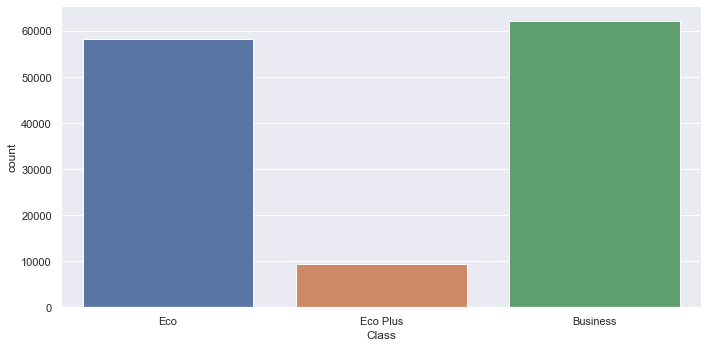

In [12]:
sb.catplot(x = 'Class', data = satisfactionData, kind = "count", aspect= 2)

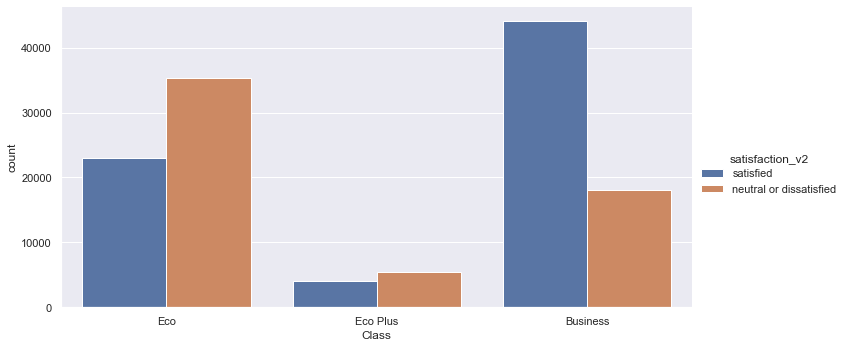

In [13]:
sb.catplot(x='Class', data = satisfactionData, hue= 'satisfaction_v2', kind = "count", aspect= 2)

<AxesSubplot:xlabel='Class', ylabel='satisfaction_v2'>

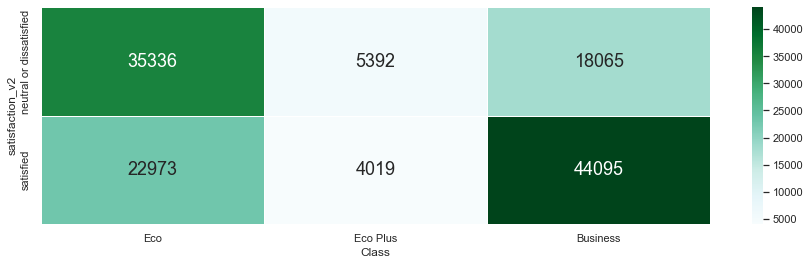

In [14]:
# satisfaction_v2 vs Class
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Class']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<a id="type-of-travel-ea"></a>
<div class="alert alert-block alert-info">
    <b>Type of Travel (Categorical)</b><br>
    This variable seems to describle type/purpose of travel of the passenger.<br>
    <b>Values</b><br>
    We observed that there are 2 unique values <code>Personal Travel</code> <code>Business travel</code> <br>
    <b>Distribution</b><br>
    <code>Business travel</code> has the higher distribution of 89693. <br>
    <b>Relation</b><br>
    <code>Business travel</code> appears to have higher satisfaction
    <br><br><a href="#passenger-variables-ea">Return</a>
</div>

In [15]:
print(satisfactionData['Type of Travel'].describe())
travelTypes = satisfactionData['Type of Travel'].unique()
print(travelTypes)

count              129880
unique                  2
top       Business travel
freq                89693
Name: Type of Travel, dtype: object
['Personal Travel' 'Business travel']


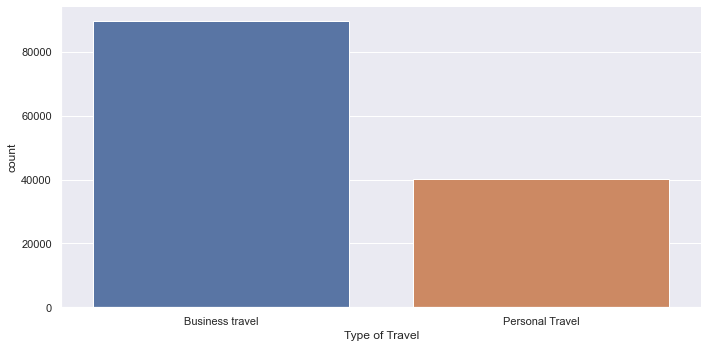

In [16]:
sb.catplot(x = 'Type of Travel', data = satisfactionData, kind = "count", 
           aspect= 2, order=['Business travel', 'Personal Travel'] )

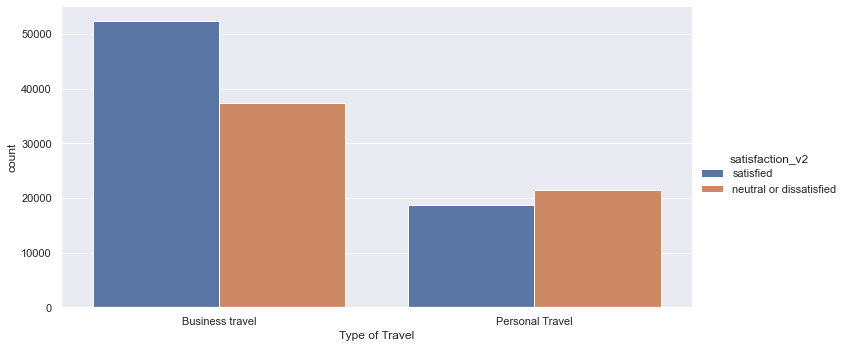

In [17]:
sb.catplot(x = 'Type of Travel', data = satisfactionData, kind = "count", hue="satisfaction_v2",
           aspect= 2, order=['Business travel', 'Personal Travel'])

<AxesSubplot:xlabel='Type of Travel', ylabel='satisfaction_v2'>

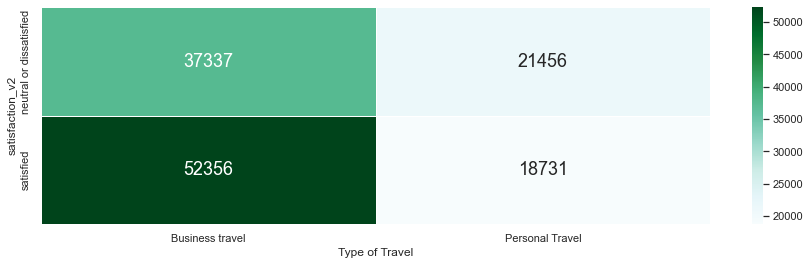

In [18]:
# satisfaction_v2 vs Customer Type
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Type of Travel']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<a id="customer-type-ea"></a>
<div class="alert alert-block alert-info">
    <b>Customer Type (Categorical)</b><br>
    This variable seems to describle if passenger is a loyal customer.<br>
    <b>Values</b><br>
    We observed that there are 2 unique values <code>Loyal Customer</code> <code>disloyal Customer</code> <br>
    We will assign them the weights as follows: <br>
    1: <code>disloyal Customer</code> 2: <code>Loyal Customer</code> <br>
    <b>Distribution</b><br>
    <code>Loyal Customer</code> has the higher distribution of 106100. <br>
    <b>Relation</b><br>
    <code>Loyal Customer</code> appears to have higher satisfaction rate
    <br><br><a href="#passenger-variables-ea">Return</a>
</div>

In [19]:
satisfactionData = pd.read_csv('satisfaction.csv')
print(satisfactionData['Customer Type'].describe())
customerTypes = satisfactionData['Customer Type'].unique()
print(customerTypes)

count             129880
unique                 2
top       Loyal Customer
freq              106100
Name: Customer Type, dtype: object
['Loyal Customer' 'disloyal Customer']


In [20]:
cat_type_customer = CategoricalDtype(categories=['disloyal Customer', 'Loyal Customer'], ordered=True)
satisfactionData['Customer Type'] = satisfactionData['Customer Type'].astype(cat_type_customer)
satisfactionData['Customer Type'].head()

0    Loyal Customer
1    Loyal Customer
2    Loyal Customer
3    Loyal Customer
4    Loyal Customer
Name: Customer Type, dtype: category
Categories (2, object): ['disloyal Customer' < 'Loyal Customer']

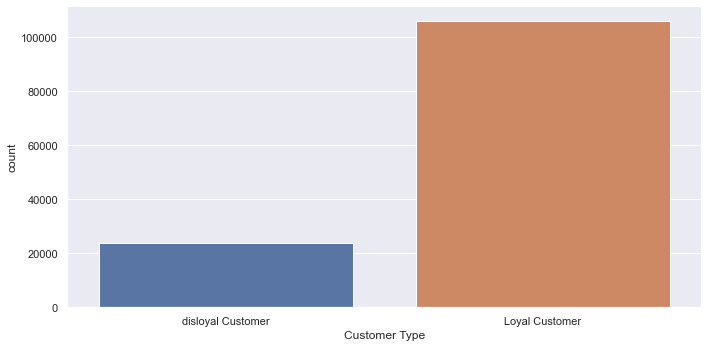

In [21]:
sb.catplot(x = 'Customer Type', data = satisfactionData, kind = "count", aspect= 2)

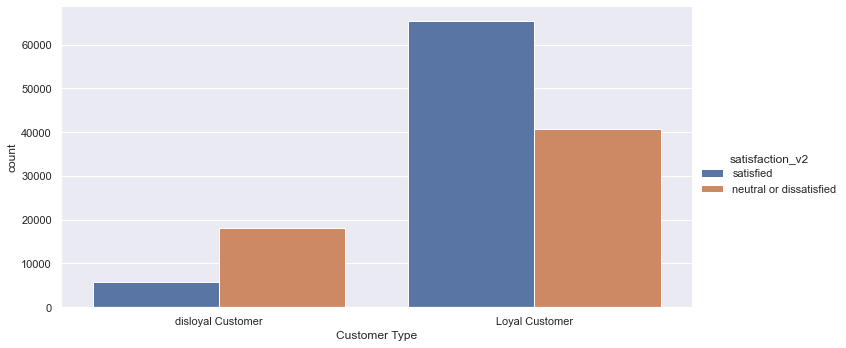

In [22]:
sb.catplot(x = 'Customer Type', data = satisfactionData, 
           hue="satisfaction_v2", kind = "count", aspect= 2)

<AxesSubplot:xlabel='Customer Type', ylabel='satisfaction_v2'>

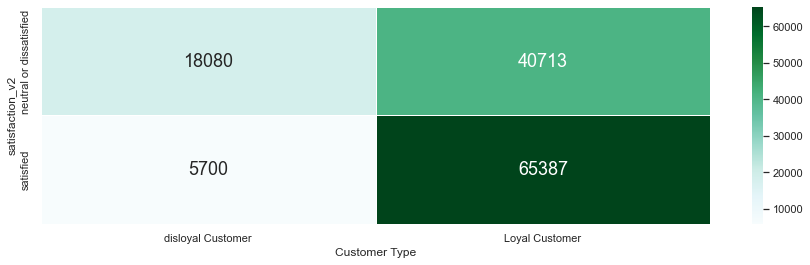

In [23]:
# satisfaction_v2 vs Customer Type
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Customer Type']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<a id="gender-ea"></a>
<div class="alert alert-block alert-info">
    <b>Gender (Categorical)</b><br>
    <b>Values</b><br>
    There are 2 unique values <code>Male</code> and <code>Female</code> <br>
    <b>Distribution</b><br>
    Even distribution 63981 : 65899  <br>
    <b>Relation</b><br>
    It appears that <code>Female</code> passengers have a higher satisfaction rate   
    <br><br><a href="#passenger-variables-ea">Return</a>
</div>

In [24]:
satisfactionData['Gender'].describe()

count     129880
unique         2
top       Female
freq       65899
Name: Gender, dtype: object

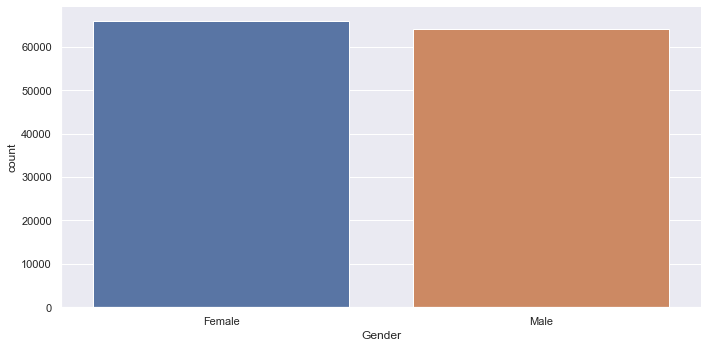

In [25]:
sb.catplot(x = 'Gender', data = satisfactionData, kind = "count", aspect= 2)

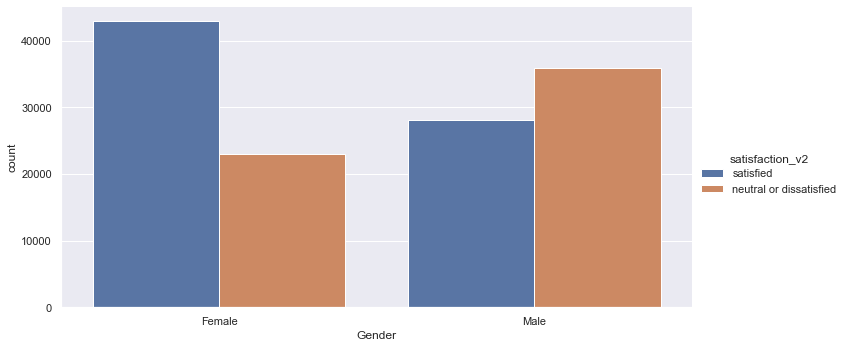

In [26]:
sb.catplot(x = 'Gender', data = satisfactionData, 
           hue="satisfaction_v2", kind = "count", aspect= 2)

<AxesSubplot:xlabel='Gender', ylabel='satisfaction_v2'>

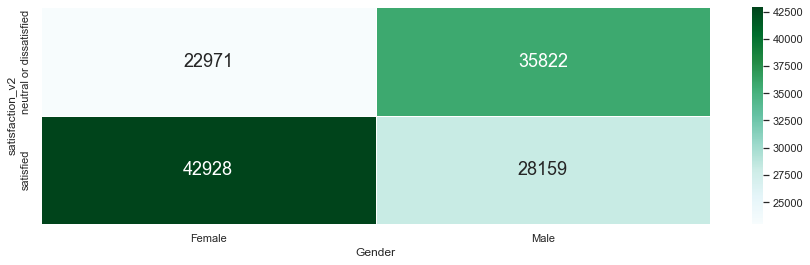

In [27]:
# satisfaction_v2 vs Gender
f = plt.figure(figsize=(15, 4))
sb.heatmap(satisfactionData.groupby(['satisfaction_v2', 'Gender']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<a id="age-ea"></a>
<div class="alert alert-block alert-info">
    <b>Age (Numeric)</b><br>
    <b>Values</b><br>
    There are 2 unique values <code>Male</code> and <code>Female</code> <br>
    <b>Relation</b><br>
    It appears that ages <code>40</code> to <code>60</code>passengers have a higher satisfaction rate    
    <br><br><a href="#passenger-variables-ea">Return</a>
</div>

In [28]:
satisfactionData['Age'].describe()

count    129880.000000
mean         39.427957
std          15.119360
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

<AxesSubplot:>

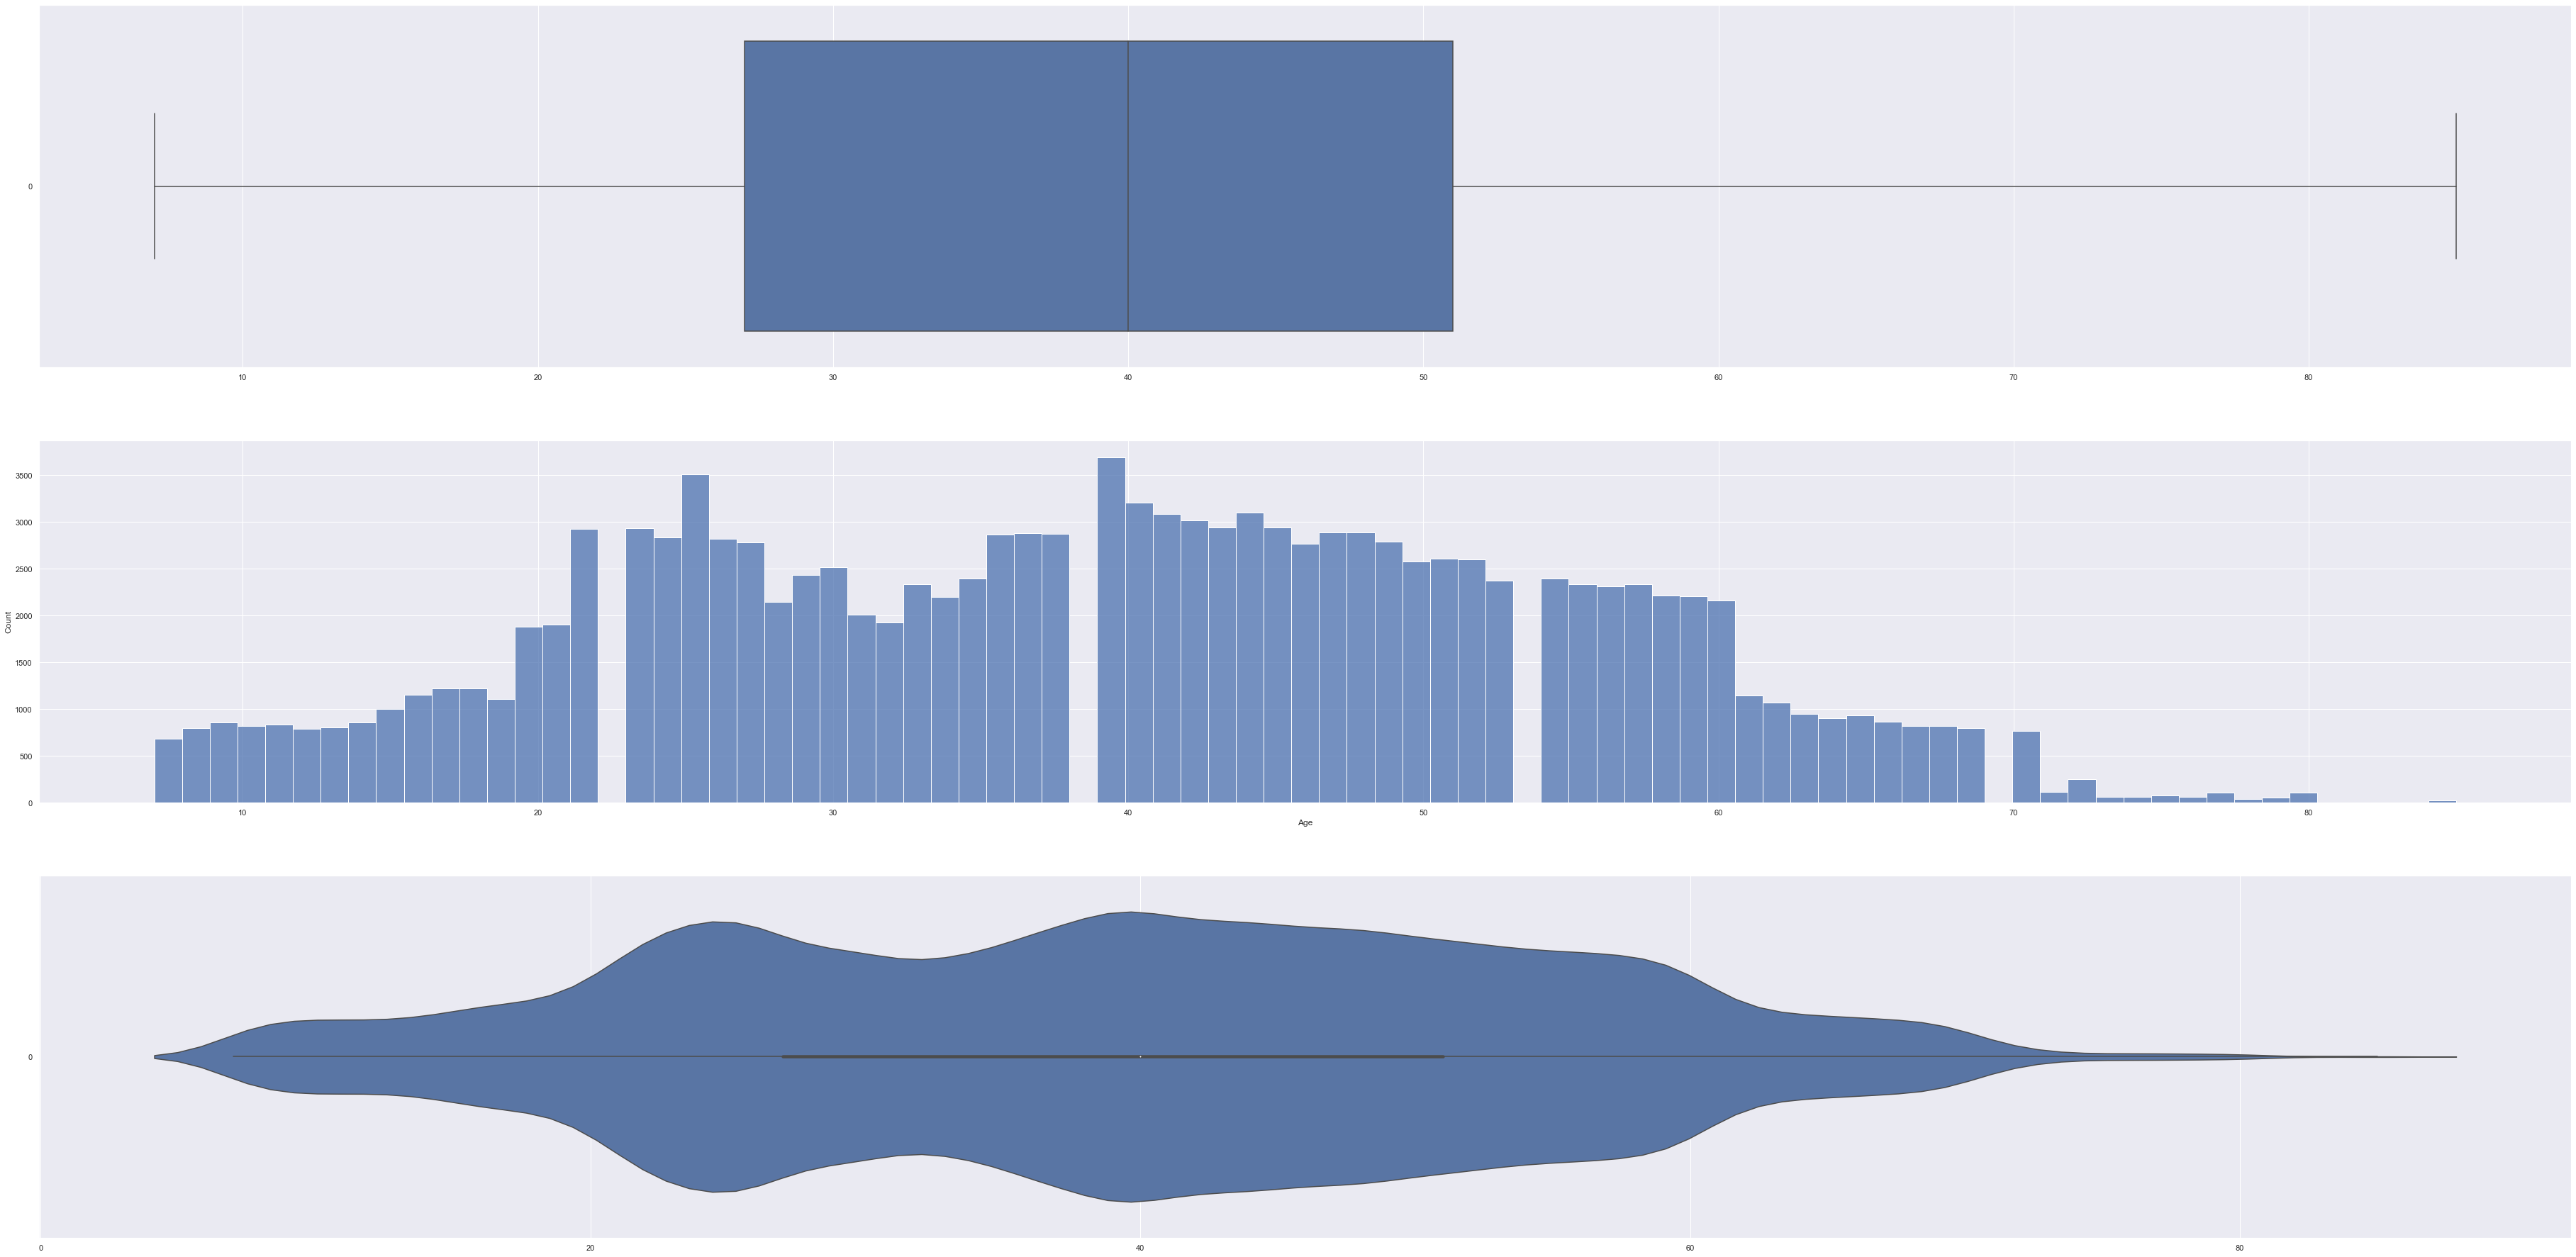

In [29]:
f, axes = plt.subplots(3, 1, figsize=(64, 32))
sb.boxplot(data = satisfactionData['Age'], orient = "h", ax = axes[0])
sb.histplot(data = satisfactionData['Age'], ax = axes[1])
sb.violinplot(data = satisfactionData['Age'], orient = "h", ax = axes[2])

<AxesSubplot:xlabel='Age', ylabel='satisfaction_v2'>

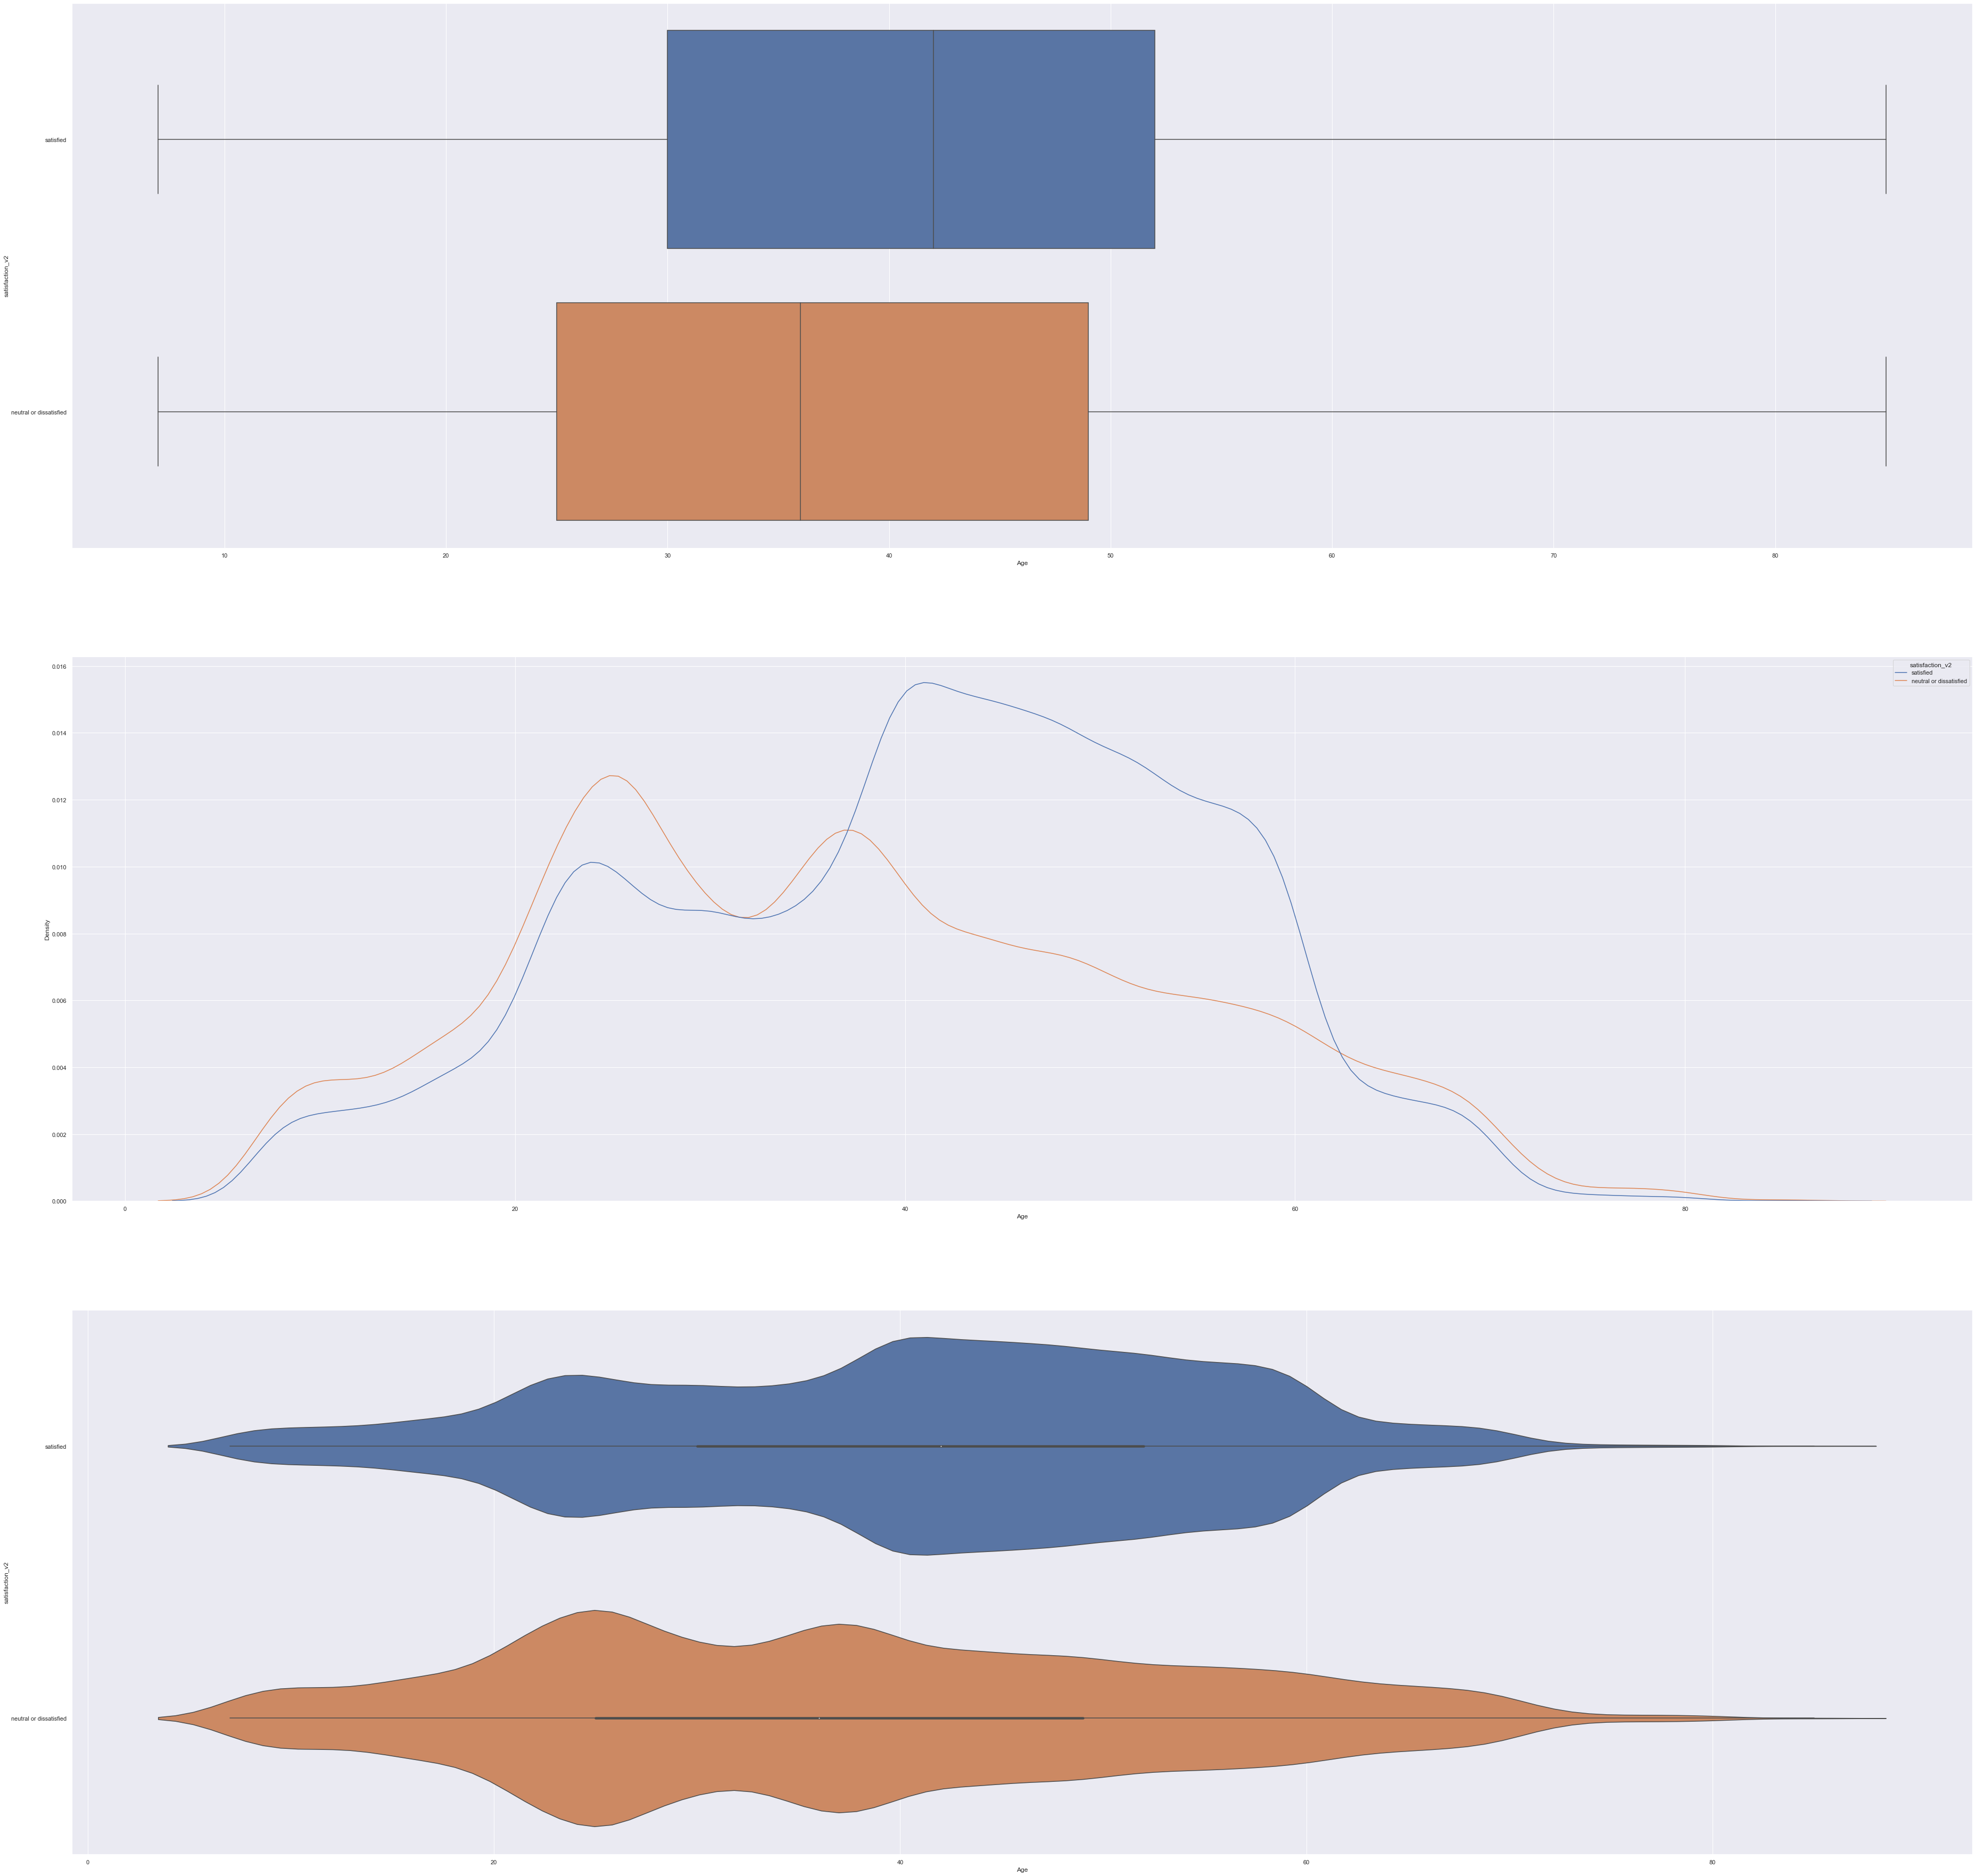

In [30]:
f, axes = plt.subplots(3, 1, figsize=(64, 64))
sb.boxplot(data = satisfactionData, orient = "h", ax = axes[0],
          x ='Age', y = 'satisfaction_v2')
sb.kdeplot(data = satisfactionData, ax = axes[1],
          x ='Age', hue = 'satisfaction_v2')
sb.violinplot(data = satisfactionData, orient = "h", ax = axes[2],
          x ='Age', y = 'satisfaction_v2')

<div class="alert alert-block alert-info">
    <b>Age + Gender</b><br>
    Analyse the relation with Age + Gender.<br>
    We observe that the graphs are fairly similar. Not much difference in relation.
</div>

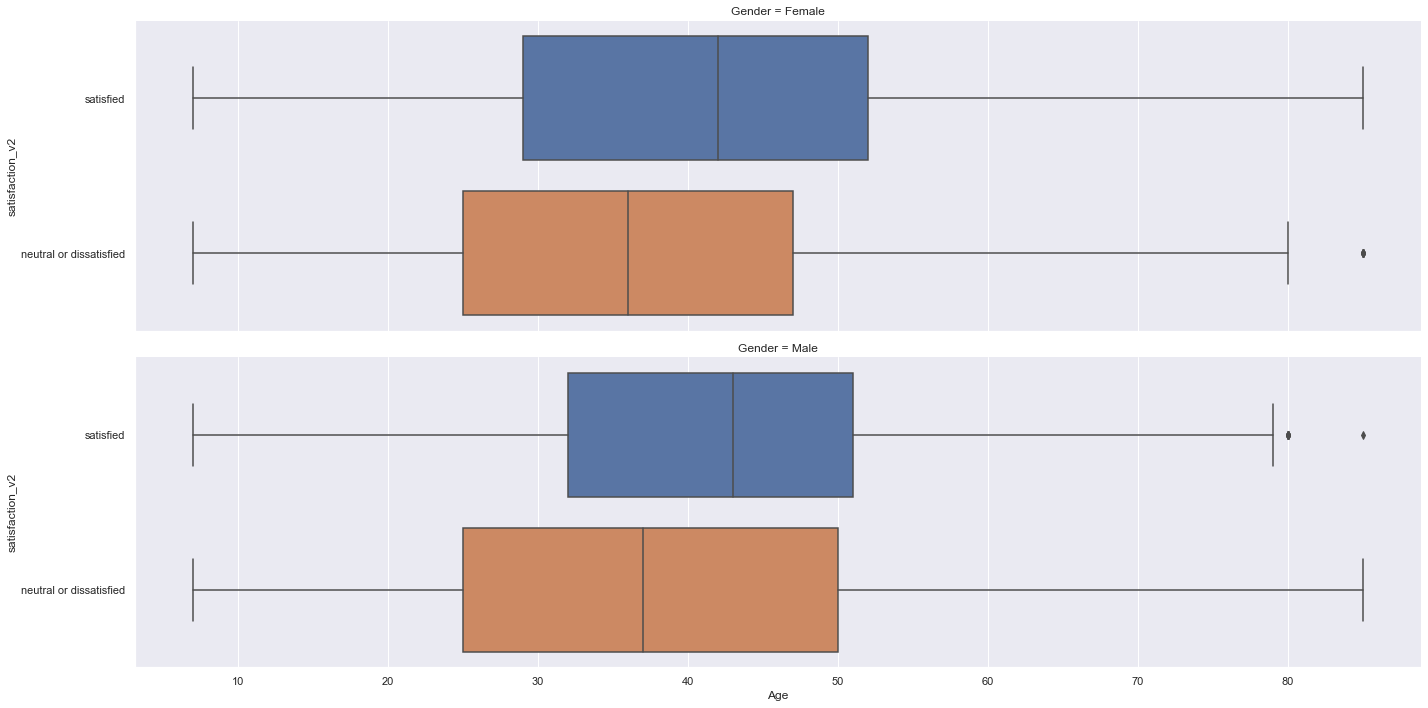

In [31]:
sb.catplot(x = 'Age', y = 'satisfaction_v2', row = 'Gender', data = satisfactionData, kind = 'box', aspect = 4)

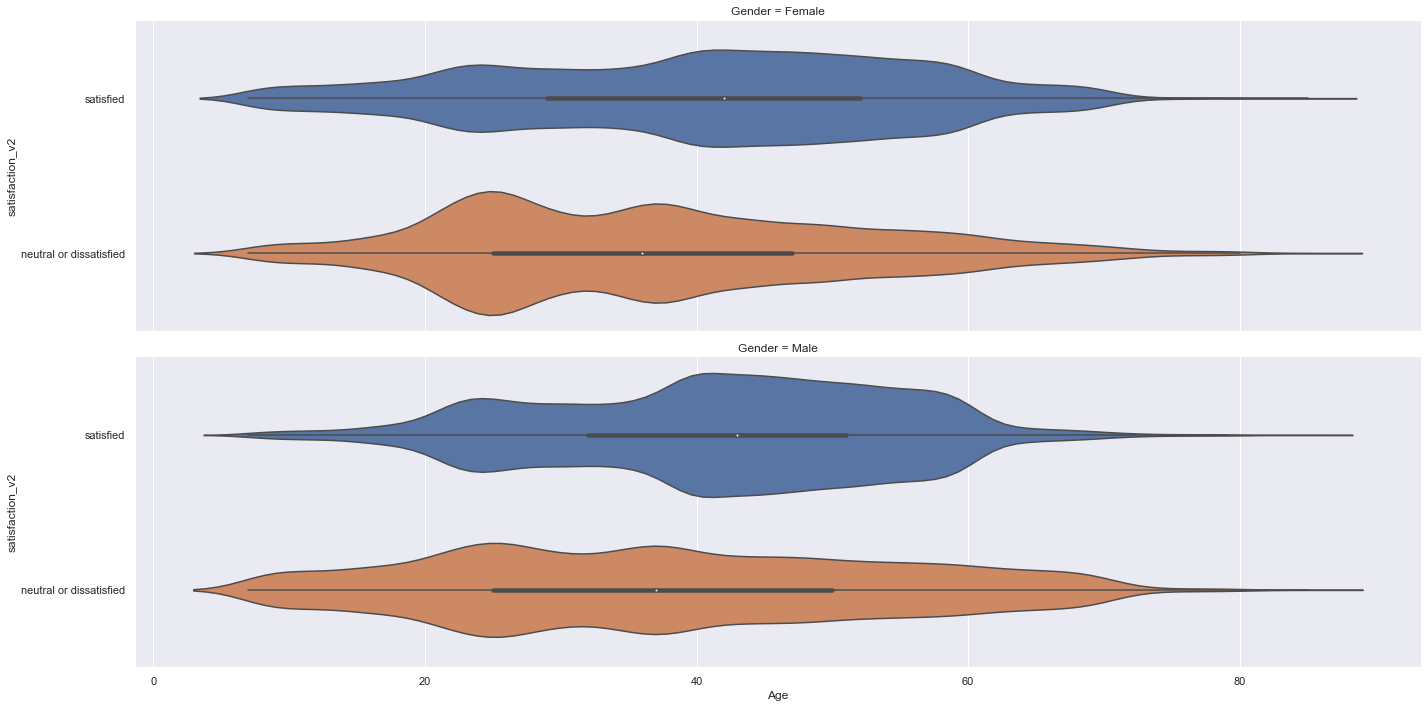

In [32]:
sb.catplot(x = 'Age', y = 'satisfaction_v2', row = 'Gender', 
           data = satisfactionData, kind = 'violin', aspect = 4)

<a id="service-variables-ea"></a>
#### Service Variables
For our problem case, we will be focusing mainly on services on board the plane.<br>
**Focus**:
<code>Seat comfort</code> 
<code>Food and drink</code> 
<code>Inflight wifi service</code> 
<code>Inflight entertainment</code> 
<code>On-board service</code> 
<code>Leg room service</code> 
<code>Checkin service</code>
<code>Cleanliness</code>

**Non-Focus**:
<code>Online support</code> 
<code>Ease of Online booking</code> 
<code>Baggage handling</code>
<code>Online boarding</code>



<div class="alert alert-block alert-info">
    <b>Focus Service Variables (Categorical)</b><br>
    <b>Values</b><br>
    We observed that there are 6 unique values from 0 to 5.<br>
    All of which are <i>rating</i> type variables.<br>
    <b>Relation</b><br>
    We observed that generally, ratings 4 and 5 have higher statisfaction rate.<br>
    But more notably, 
    <code>Seat comfort</code>
    <code>Food and drink</code>
    <code>Inflight entertainment</code> seems to have strong relation to satisfaction. <br>
    Specifically speaking, ratings <code>4</code> and <code>5</code> have higher statisfaction rate and additionally,<br>
    ratings <code>2</code> and <code>3</code> have higher neutral/distatisfaction rate
</div>

In [33]:
focusVariables = ['Seat comfort', 'Food and drink', 
                  'Inflight wifi service', 'Inflight entertainment',
                  'On-board service','Leg room service','Checkin service',
                  'Cleanliness']

satisfactionData[focusVariables].describe()

,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,On-board service,Leg room service,Checkin service,Cleanliness
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,2.838597,2.851994,3.249130,3.383477,3.465075,3.485902,3.340807,3.705759
std,1.392983,1.443729,1.318818,1.346059,1.270836,1.292226,1.260582,1.151774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [2]:
from IPython.display import Markdown, display
import asyncio

def printHeader(col, phref):
    markdown = f'<div class="alert alert-block alert-info"><b>{col}</b><br><br><a href="#{phref}">Return</a></div>'
    display(Markdown(markdown))

def printExploratoryAnalysis(col, data, dataType, parentSectionId):
    printHeader(col, parentSectionId)
    if(dataType=='categorical'):
        sb.catplot(x = col, data = data, kind = "count", aspect= 2)
        sb.catplot(x = col, data = data, hue="satisfaction_v2", kind = "count", aspect= 2)
        f = plt.figure(figsize=(15, 4))
        sb.heatmap(satisfactionData.groupby(['satisfaction_v2', col]).size().unstack(),
                         linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
        plt.show()
    elif(dataType=='Numerical'):
        f, axes = plt.subplots(3, 1, figsize=(64, 32))
        bp = sb.boxplot(data = satisfactionData[col], orient = "h", ax = axes[0])
        hp = sb.histplot(data = satisfactionData[col], ax = axes[1])
        vp = sb.violinplot(data = satisfactionData[col], orient = "h", ax = axes[2])
        f, axes = plt.subplots(3, 1, figsize=(64, 48))
        rbp = sb.boxplot(data = departDelayDataClean, orient = "h",
                   x = col, y = 'satisfaction_v2', ax = axes[0])
        rkp = sb.kdeplot(data = departDelayDataClean,
                   x= col, hue='satisfaction_v2', ax = axes[1])
        rvp = sb.violinplot(data = departDelayDataClean, orient = "h",
               x = col, y = 'satisfaction_v2', ax = axes[2])
        plt.show()
    display(Markdown('---'))

<div class="alert alert-block alert-info"><b>Seat comfort</b><br><br><a href="#service-variables-ea">Return</a></div>

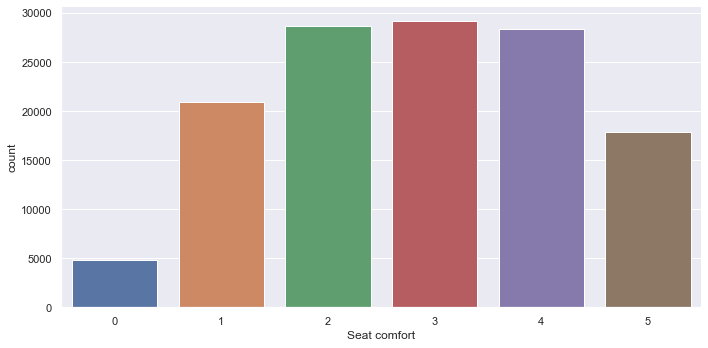

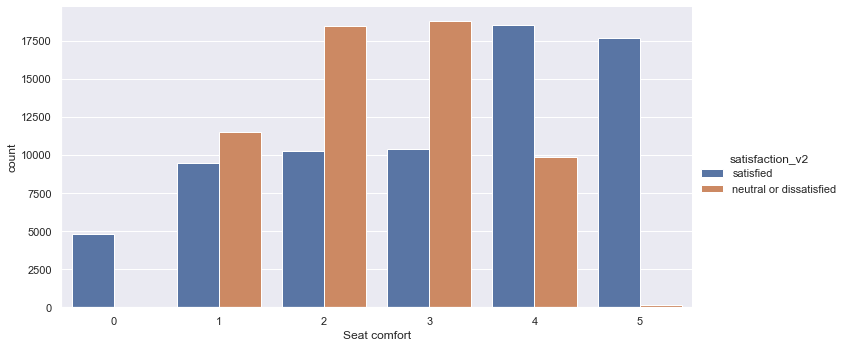

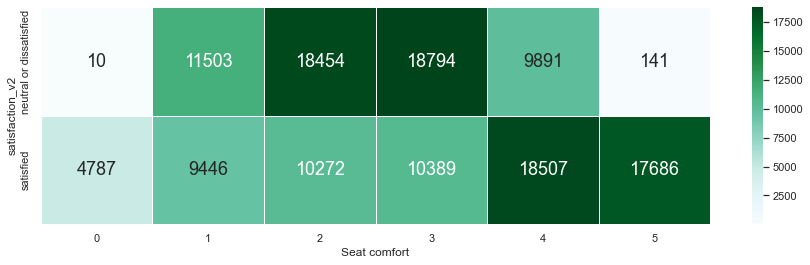

---

<div class="alert alert-block alert-info"><b>Food and drink</b><br><br><a href="#service-variables-ea">Return</a></div>

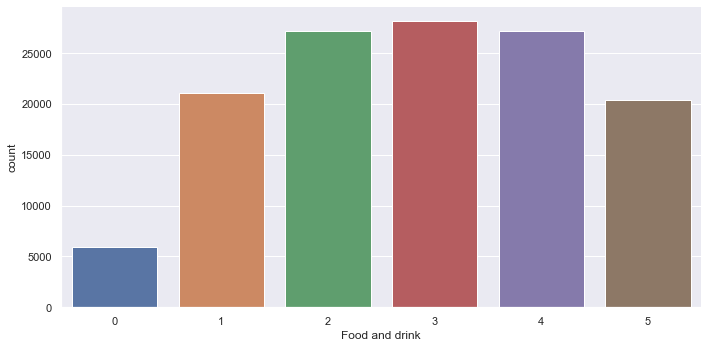

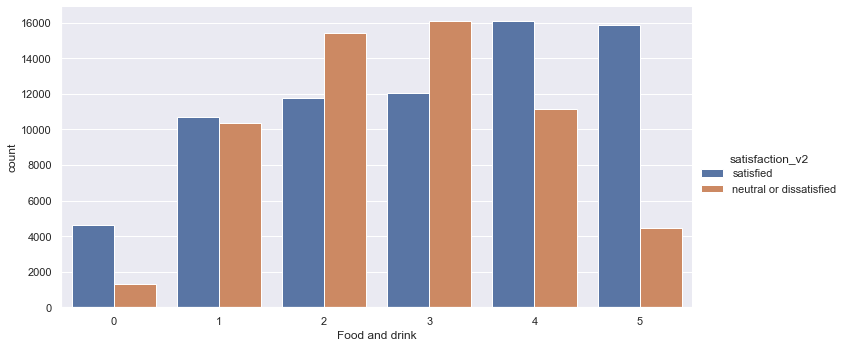

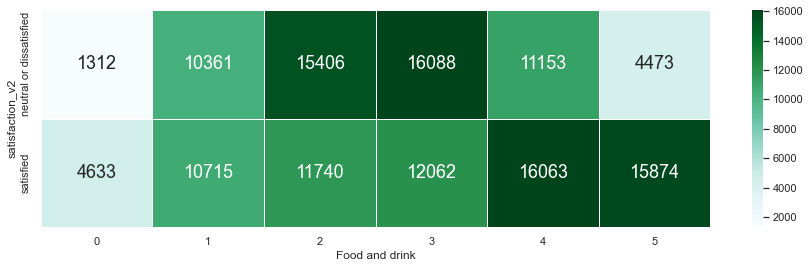

---

<div class="alert alert-block alert-info"><b>Inflight wifi service</b><br><br><a href="#service-variables-ea">Return</a></div>

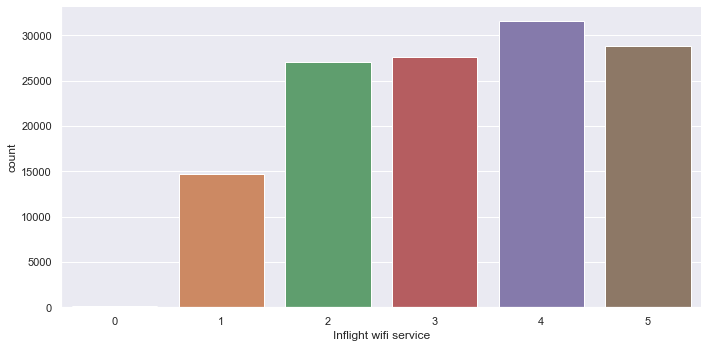

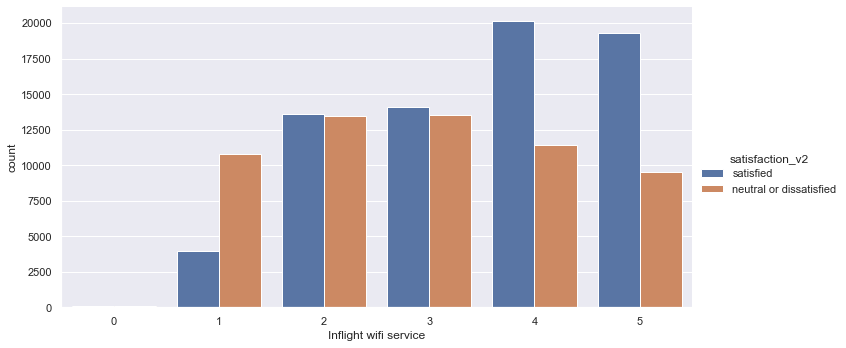

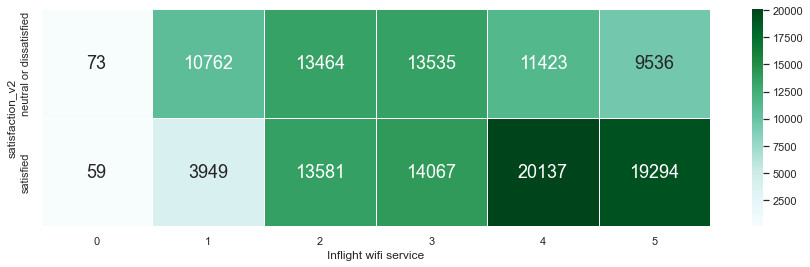

---

<div class="alert alert-block alert-info"><b>Inflight entertainment</b><br><br><a href="#service-variables-ea">Return</a></div>

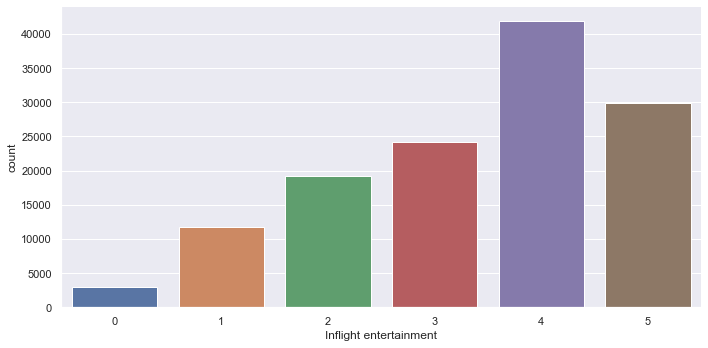

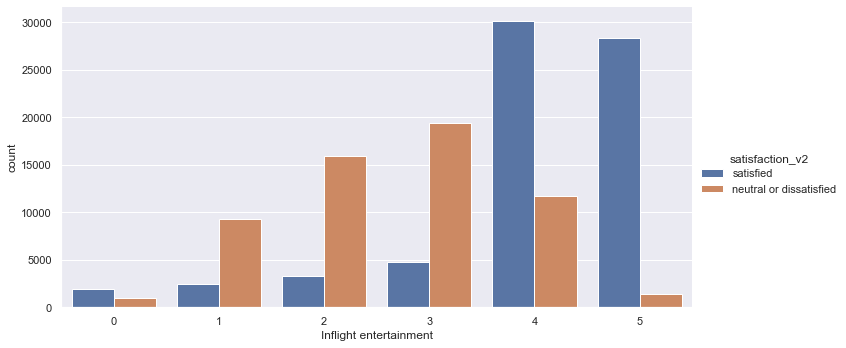

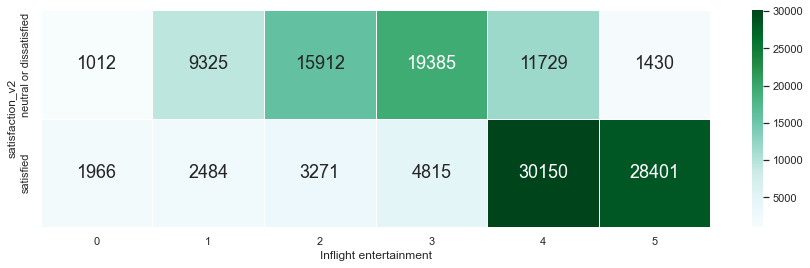

---

<div class="alert alert-block alert-info"><b>On-board service</b><br><br><a href="#service-variables-ea">Return</a></div>

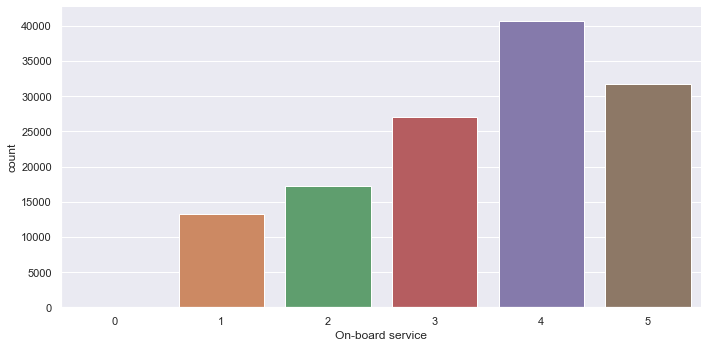

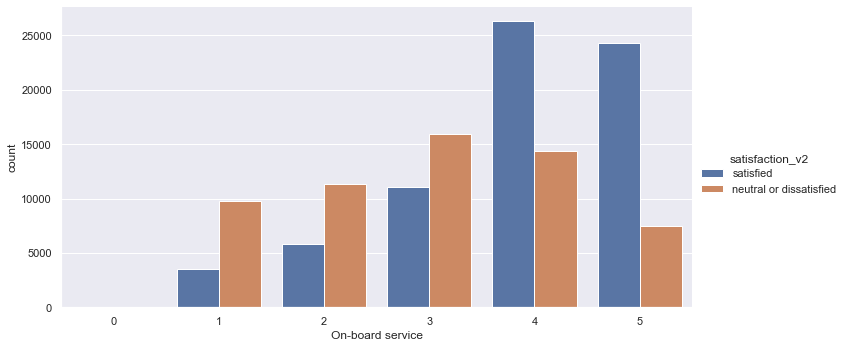

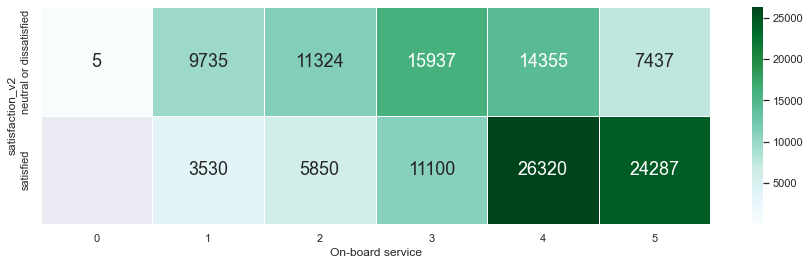

---

<div class="alert alert-block alert-info"><b>Leg room service</b><br><br><a href="#service-variables-ea">Return</a></div>

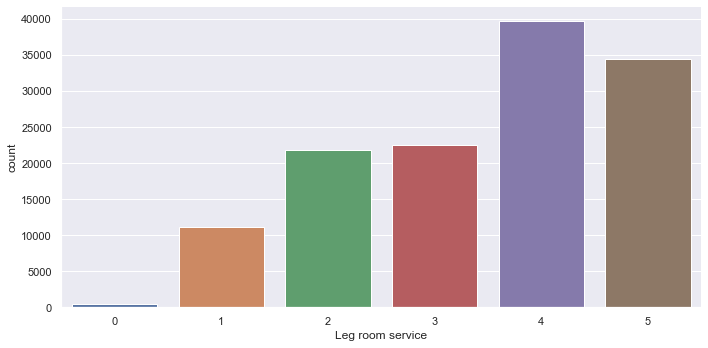

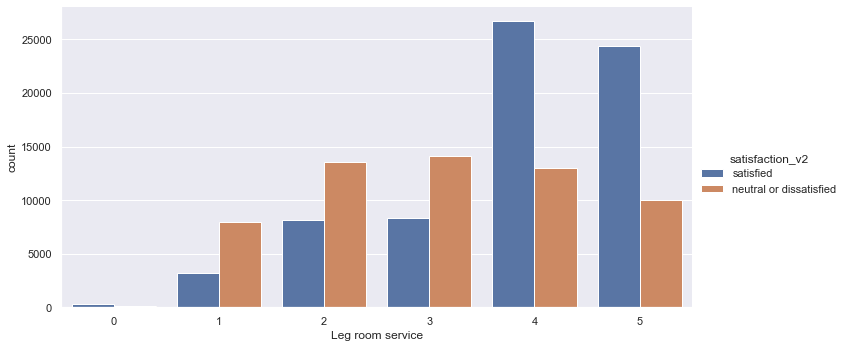

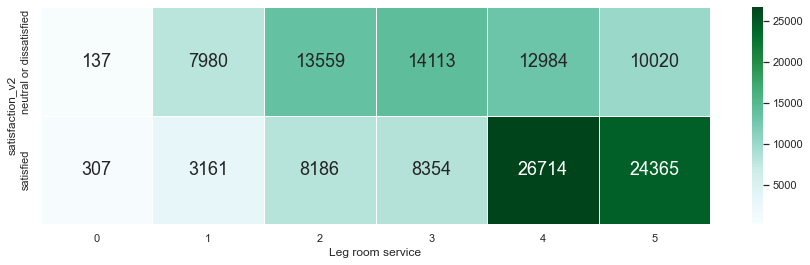

---

<div class="alert alert-block alert-info"><b>Checkin service</b><br><br><a href="#service-variables-ea">Return</a></div>

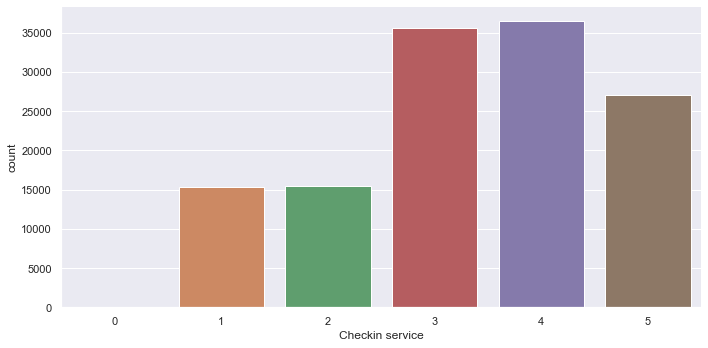

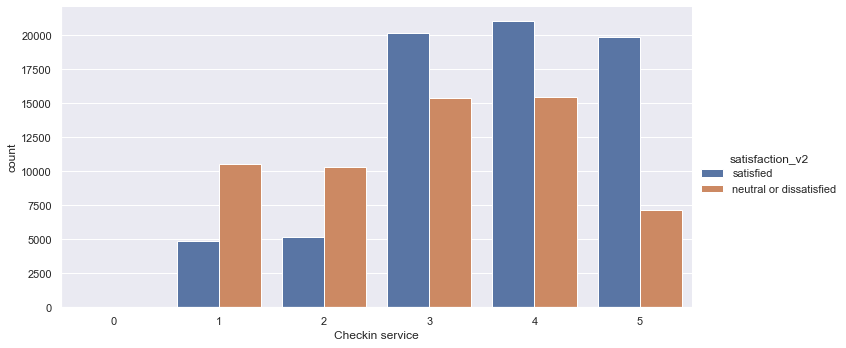

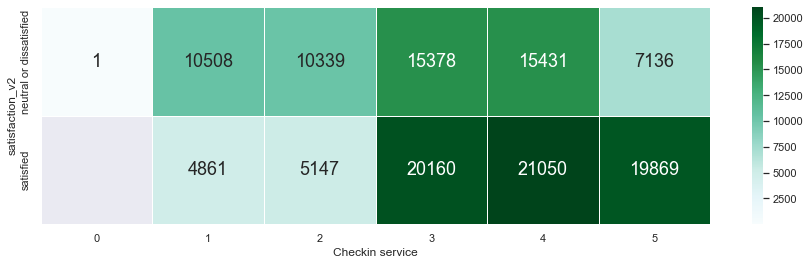

---

<div class="alert alert-block alert-info"><b>Cleanliness</b><br><br><a href="#service-variables-ea">Return</a></div>

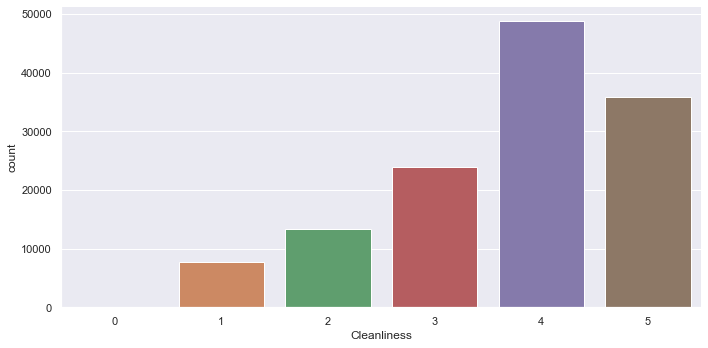

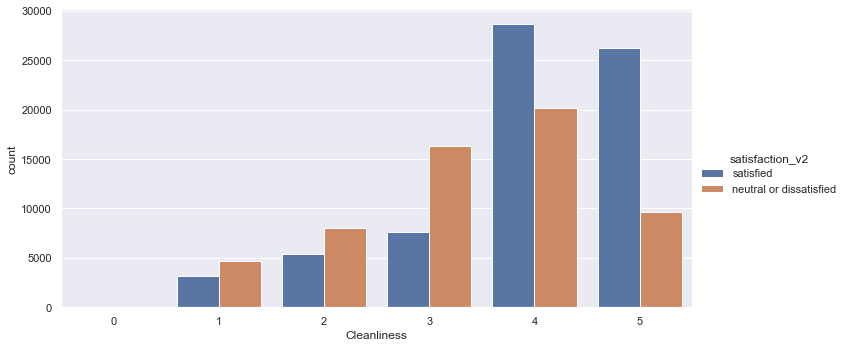

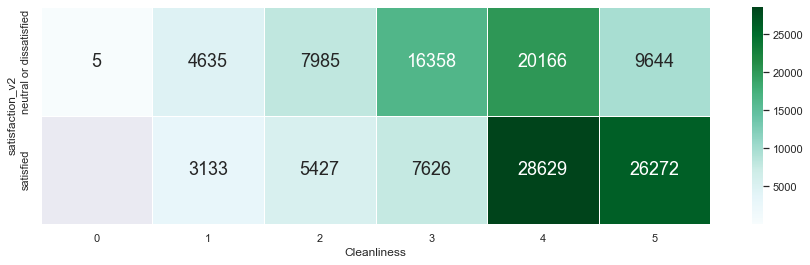

---

In [35]:
for var in focusVariables:
    printExploratoryAnalysis(var, satisfactionData, 'categorical', 'service-variables-ea')

<a id="other-variables-ea"></a>
#### Other Variables
Other variables that are not related to customer or airline service. <br>
<b>Categorical</b>: 
<a href="#gate-location-ea"><code>Gate location</code></a>
<a href="#departure-arrival-convenient-ea"><code>Departure/Arrival convenient</code></a>
<a href="#baggage-handling-ea"><code>Baggage handling</code></a>
<br>
<b>Numeric</b> : 
<a href="#flight-distance-ea"><code>Flight Distance</code></a>
<a href="#departure-delay-ea"><code>Departure Delay in Minutes</code></a>
<a href="#arrival-delay-ea"><code>Arrival Delay in Minutes</code></a>


<a id="departure-arrival-convenient-ea"></a>
<div class="alert alert-block alert-info">
    <b>Categorical</b><br>
    <b>Values</b><br>
    We observed that there are 6 unique values from 0 to 5.<br>
    It is a <i>rating</i> type variable.<br>
    <b>Distribution</b><br>
    Gate location: Rating <code>3</code> has highest frequency.<br>
    Departure/Arrival time convenient: Rating <code>4</code> has highest frequency.<br>
    Baggage handling: Rating <code>4</code> has highest frequency.<br>
    <b>Relation</b><br>
    No clear relation for Gate location and Departure/Arrival time convenient.<br>
    But rating <code>4</code> <code>5</code> for Baggage handling have higher satisfaction rate.<br>
    <br><br><a href="#other-variables-ea">Return</a>
</div>

<a id="gate-location-ea"></a>
###### `Gate Location` 
Most likely represent the convenience of the gate location.  
As the airline may not choose their gate location, we did not include under service.<br>
<a id="gate-location-ea"></a>
###### `Departure/Arrival convenient`
This variable seems to describle covenience of the flight departure and arrival times.  
Although flight timings are provided by the airline, the passenger normally pick the timeslot.  
As such, we labeled it under **Other Variables**  
<a id="baggage-handling-ea"></a>
###### `Baggage handling`
As baggage handling are not on-board services, we did not include it under service.


<div class="alert alert-block alert-info"><b>Gate location</b><br><br><a href="#other-variables-ea">Return</a></div>

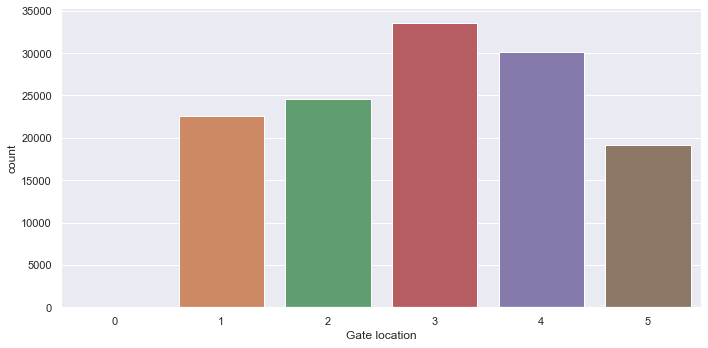

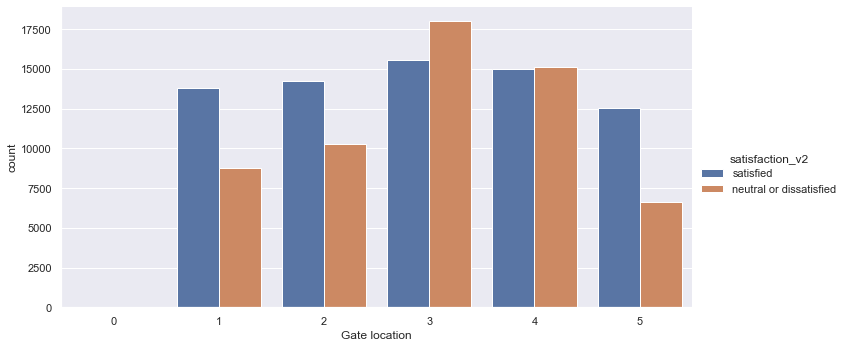

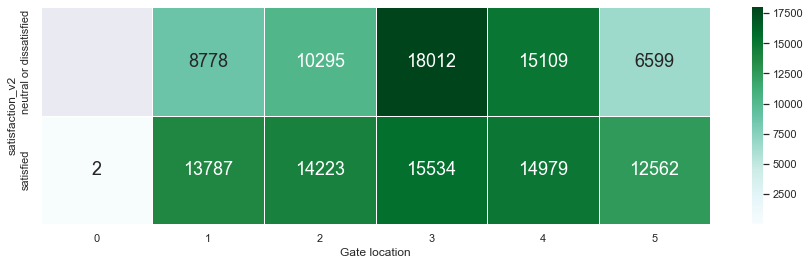

---

<div class="alert alert-block alert-info"><b>Departure/Arrival time convenient</b><br><br><a href="#other-variables-ea">Return</a></div>

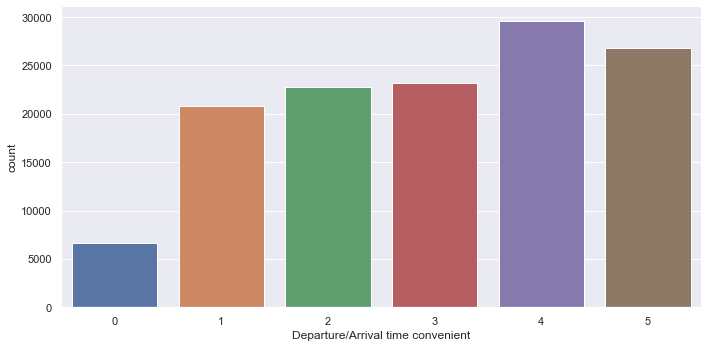

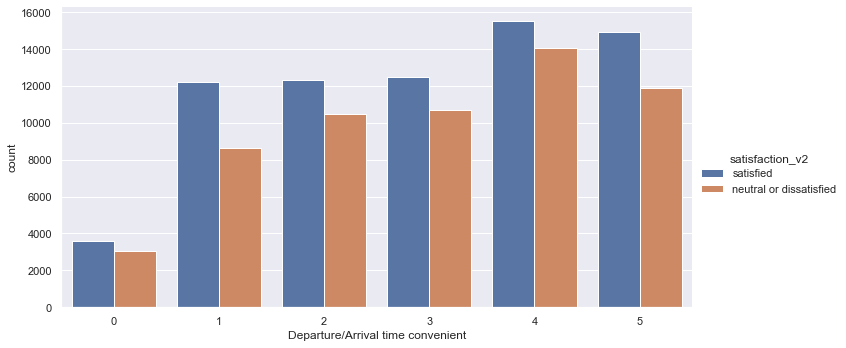

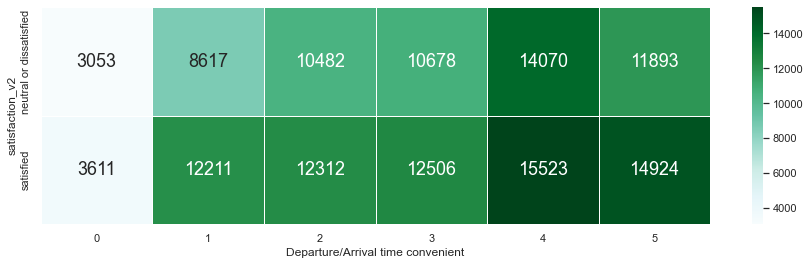

---

<div class="alert alert-block alert-info"><b>Baggage handling</b><br><br><a href="#other-variables-ea">Return</a></div>

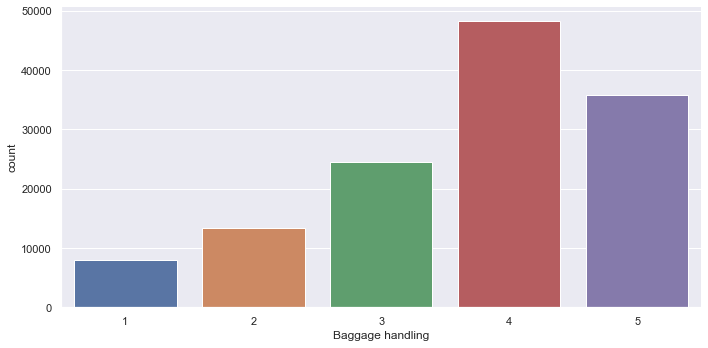

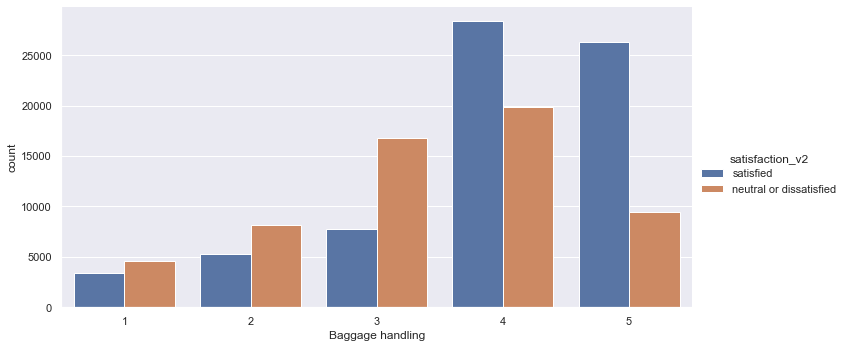

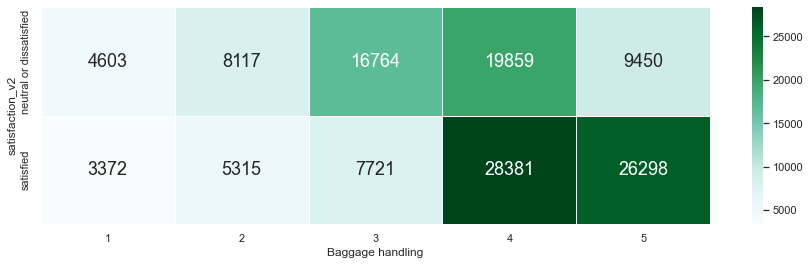

---

In [8]:
otherVariables = ['Gate location', 'Departure/Arrival time convenient', 'Baggage handling']
for var in otherVariables:
    printExploratoryAnalysis(var, satisfactionData, 'categorical', 'other-variables-ea')

<a id="flight-distance-ea"></a>
<div class="alert alert-block alert-info">
    <b>Flight Distance (Numeric)</b><br>
    This variable describes the flight distance most likely in miles.<br>
    <b>Relation</b><br>
    It appears that at below <code>1000</code> miles, satisfaction rate seems to be higher.
    <br><br><a href="#other-variables-ea">Return</a>
</div>

In [44]:
satisfactionData['Flight Distance'].describe()

count    129880.000000
mean       1981.409055
std        1027.115606
min          50.000000
25%        1359.000000
50%        1925.000000
75%        2544.000000
max        6951.000000
Name: Flight Distance, dtype: float64

<AxesSubplot:>

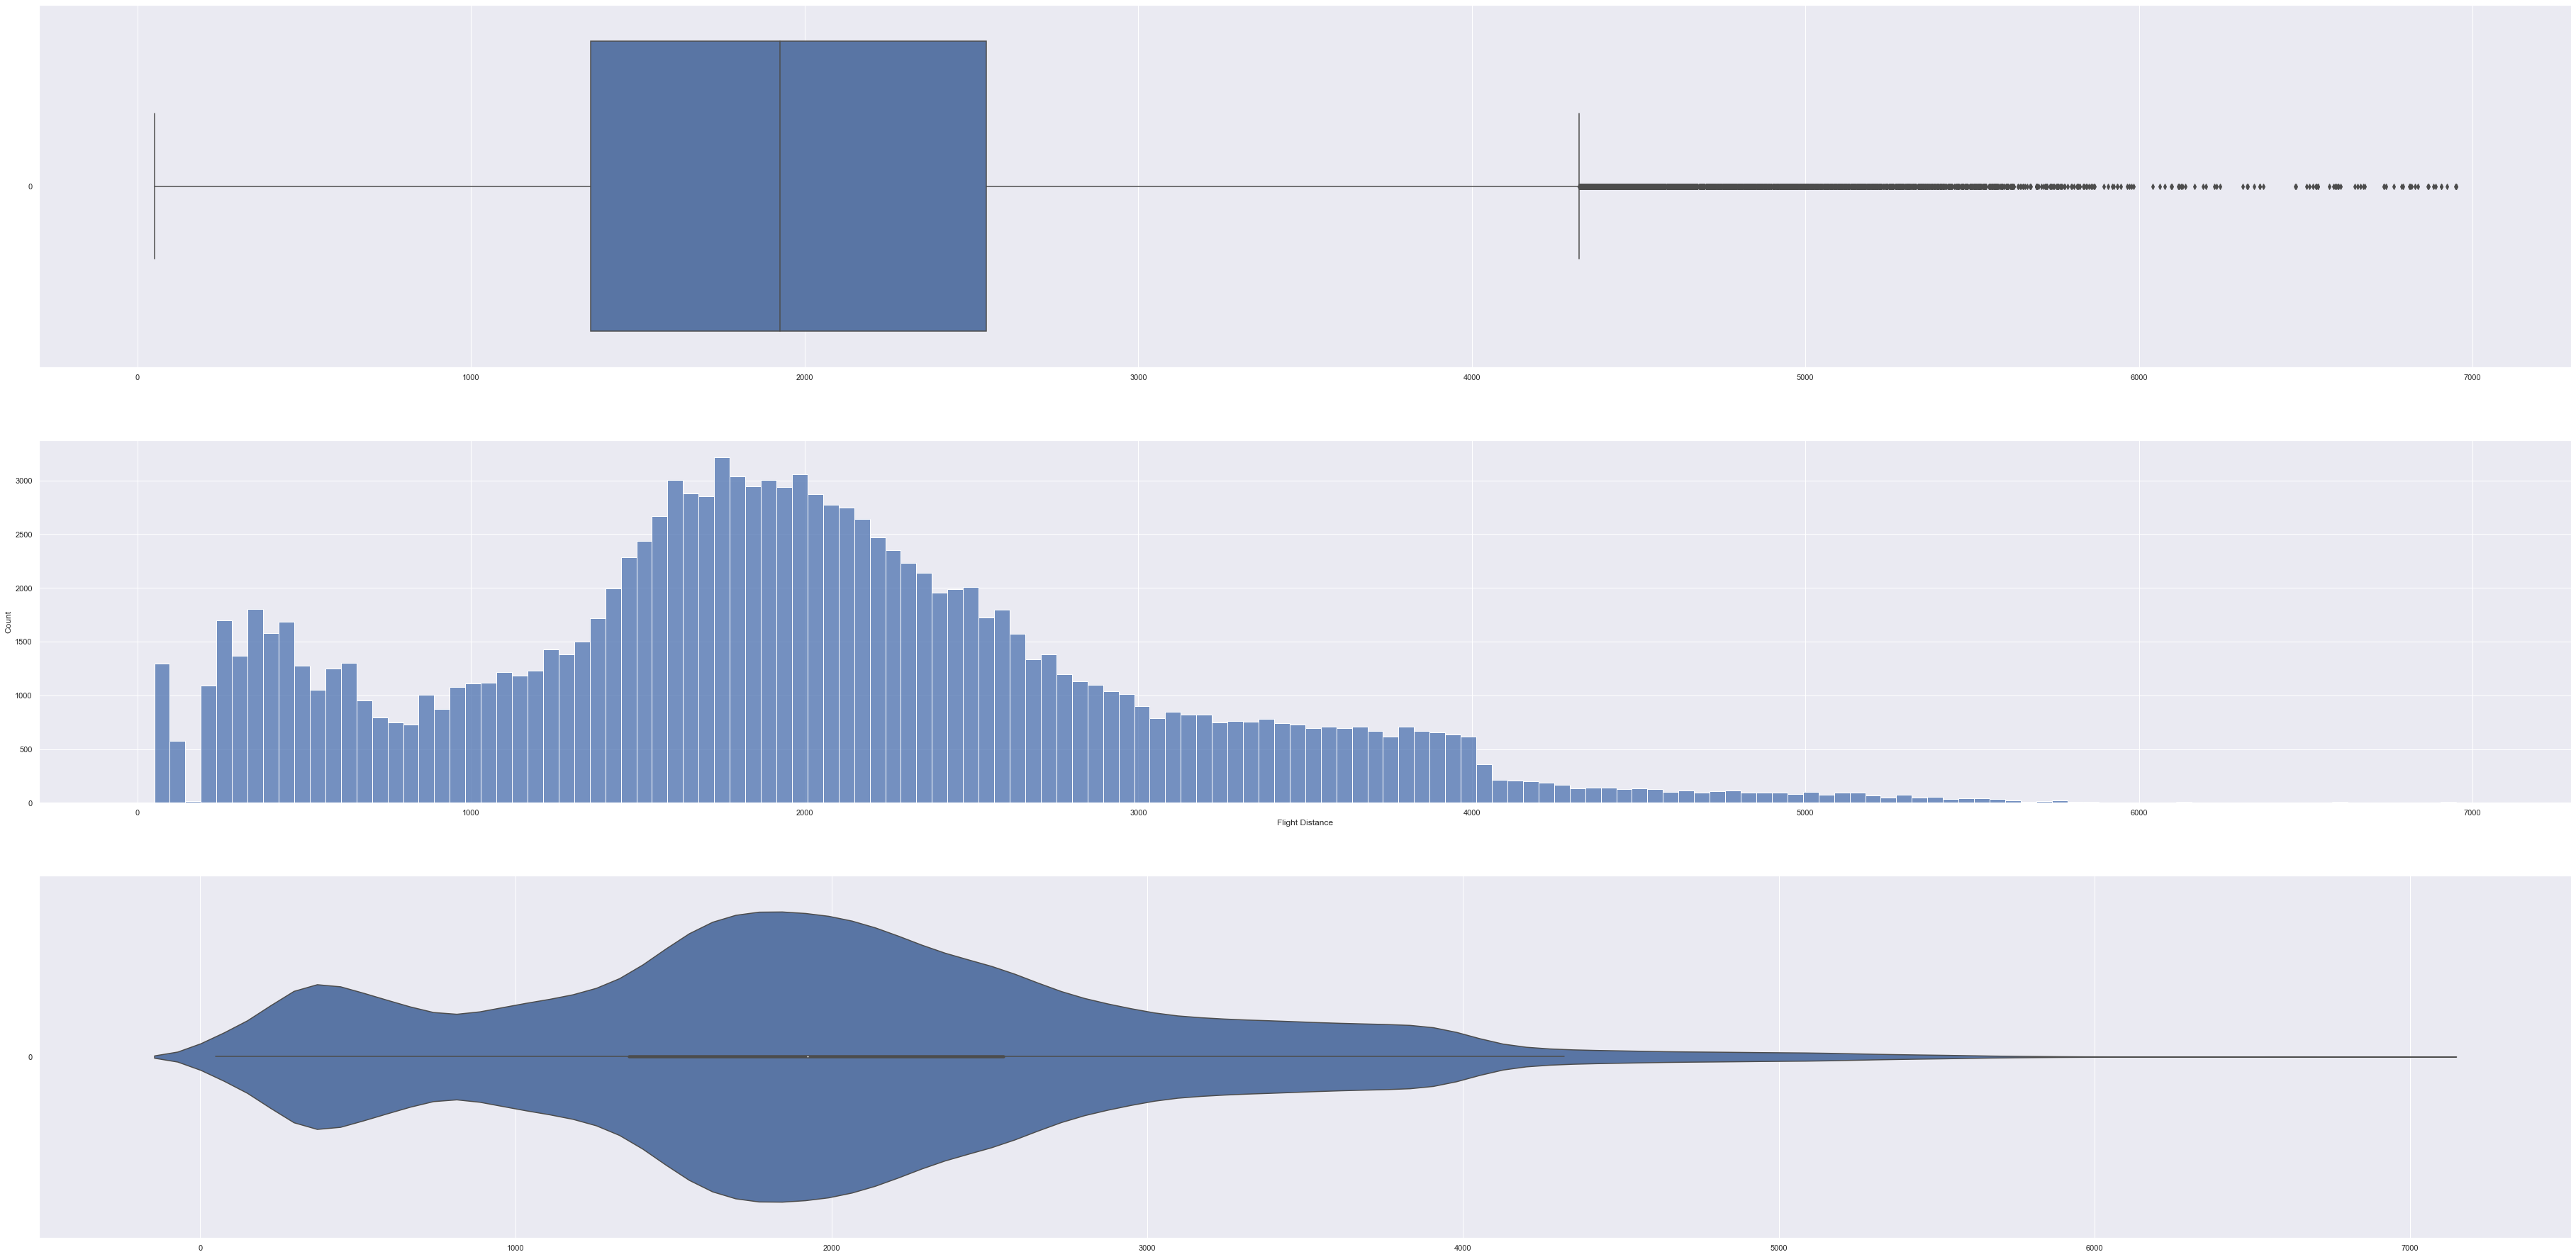

In [45]:
f, axes = plt.subplots(3, 1, figsize=(64, 32))
sb.boxplot(data = satisfactionData['Flight Distance'], orient = "h", ax = axes[0])
sb.histplot(data = satisfactionData['Flight Distance'], ax = axes[1])
sb.violinplot(data = satisfactionData['Flight Distance'], orient = "h", ax = axes[2])

<AxesSubplot:xlabel='Flight Distance', ylabel='satisfaction_v2'>

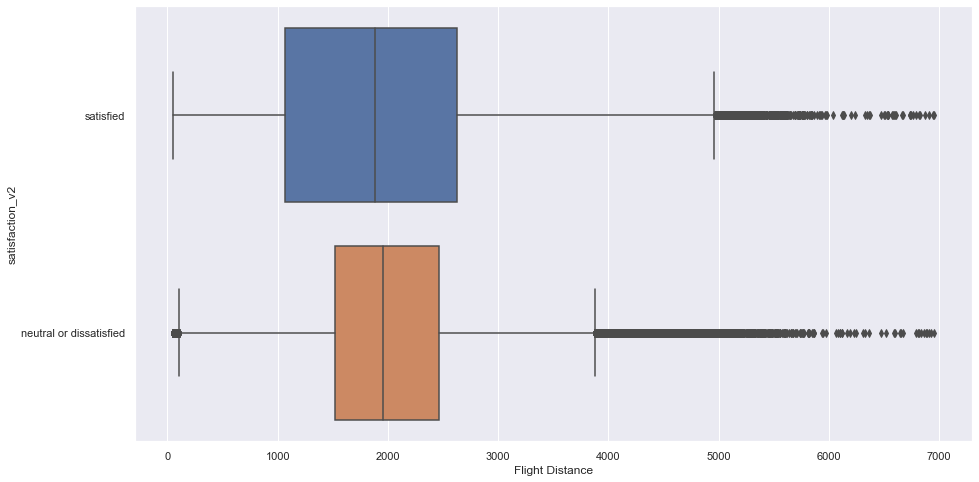

In [46]:
f = plt.figure(figsize=(15, 8))
sb.boxplot(data = satisfactionData, orient = "h",
          x ='Flight Distance', y = 'satisfaction_v2')

<AxesSubplot:xlabel='Flight Distance', ylabel='Density'>

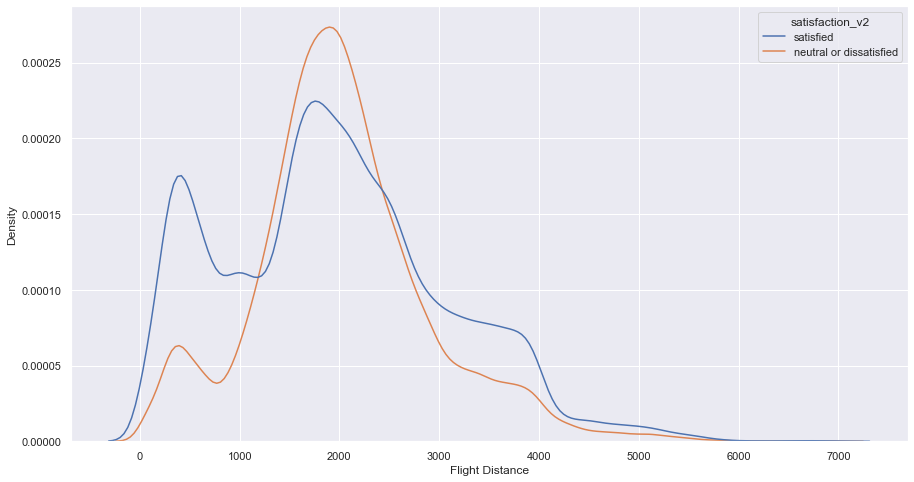

In [47]:
f = plt.figure(figsize=(15, 8))
sb.kdeplot(data = satisfactionData, x='Flight Distance',hue='satisfaction_v2')

<AxesSubplot:xlabel='Flight Distance', ylabel='satisfaction_v2'>

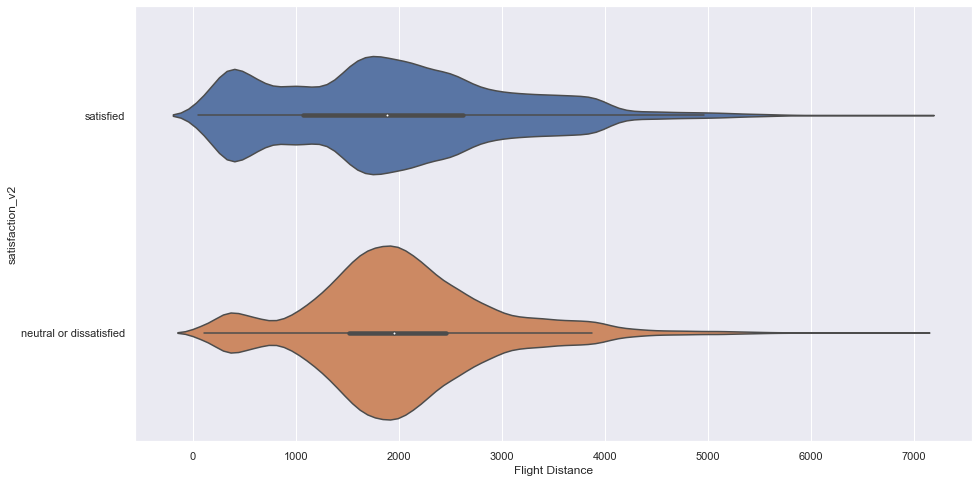

In [48]:
f = plt.figure(figsize=(15,8))
sb.violinplot(data = satisfactionData, orient = 'h',
              x = 'Flight Distance', y = 'satisfaction_v2')

<a id="departure-delay-ea"></a>
<div class="alert alert-block alert-info">
    <b>Departure Delay in Minutes (Numeric)</b><br>
    We excluded <code>0</code> departure delays<br>
    <br><br><a href="#other-variables-ea">Return</a>
</div>

In [49]:
satisfactionData['Departure Delay in Minutes'].describe()

count    129880.000000
mean         14.713713
std          38.071126
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

In [50]:
departDelayData = satisfactionData.loc[~((satisfactionData['Departure Delay in Minutes'] == 0))]
departDelayData['Departure Delay in Minutes'].describe()

count    56524.000000
mean        33.808948
std         51.815693
min          1.000000
25%          6.000000
50%         16.000000
75%         40.000000
max       1592.000000
Name: Departure Delay in Minutes, dtype: float64

<AxesSubplot:>

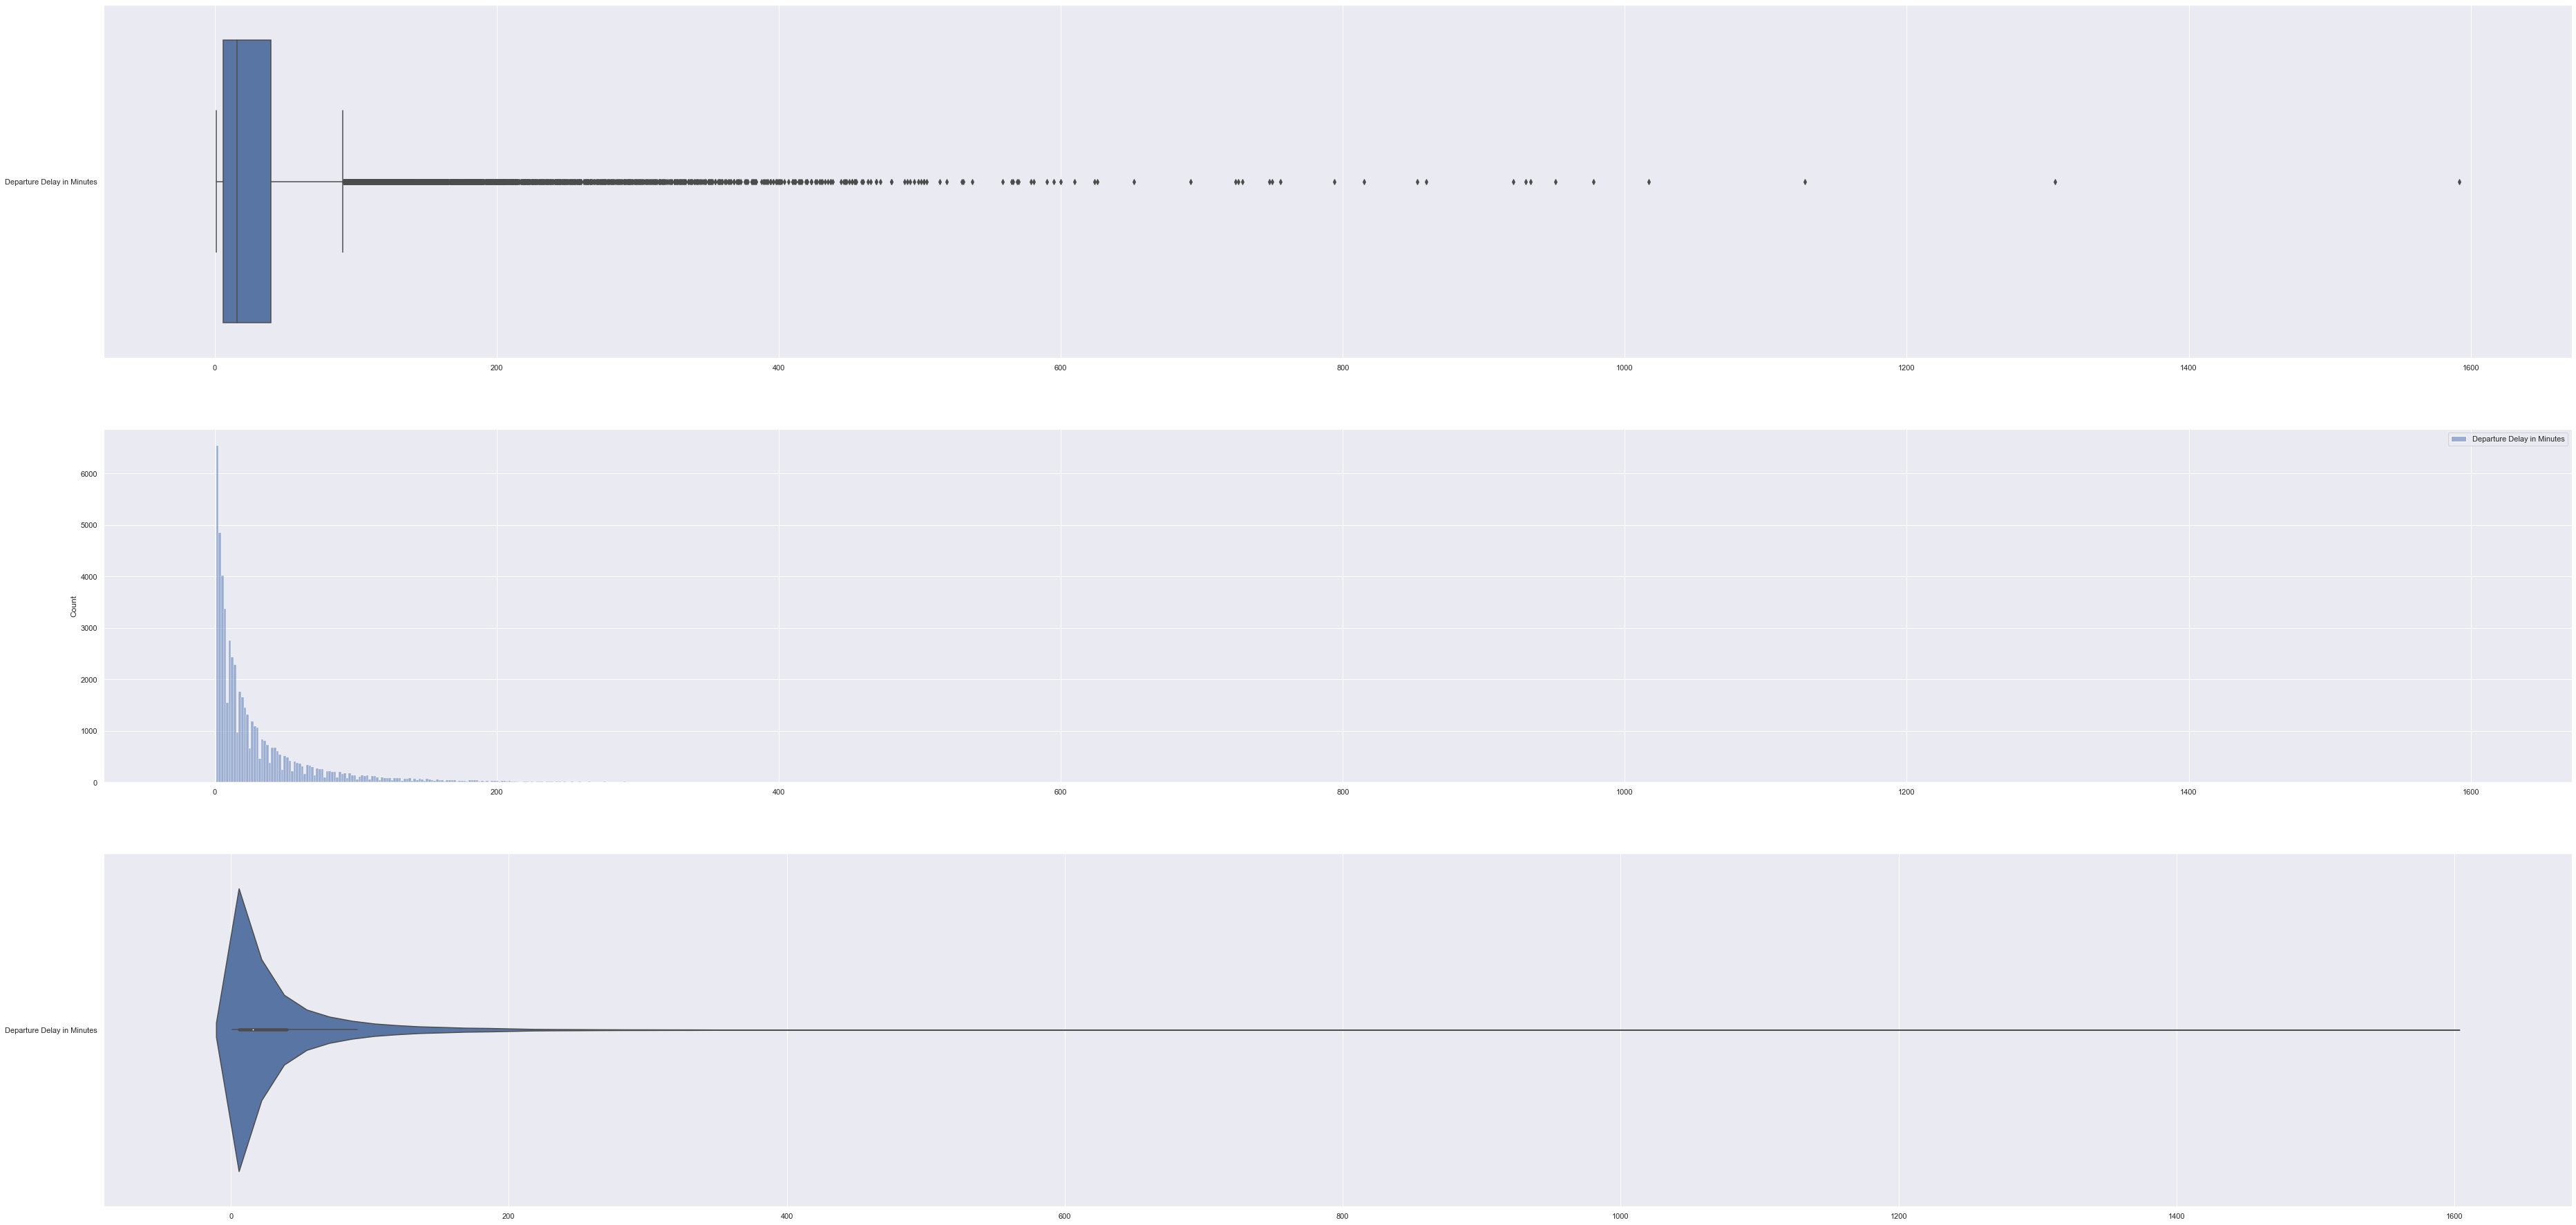

In [51]:
f, axes = plt.subplots(3, 1, figsize=(64, 32))
sb.boxplot(data = departDelayData[['Departure Delay in Minutes']], orient = "h", ax = axes[0])
sb.histplot(data = departDelayData[['Departure Delay in Minutes']], ax = axes[1])
sb.violinplot(data = departDelayData[['Departure Delay in Minutes']], orient = "h", ax = axes[2])
#sb.boxplot(data = departDelayData[['Departure Delay in Minutes']], orient = "h",showfliers=True)

<div class="alert alert-block alert-info">
    <b>Remove outliers</b>
</div>

In [52]:
departDelayDataClean = departDelayData[['Departure Delay in Minutes','satisfaction_v2']].copy()
# Calculate the quartiles
Q1 = departDelayDataClean.quantile(0.25)
Q3 = departDelayDataClean.quantile(0.75)
# Rule to identify outliers
rule = ((departDelayDataClean < (Q1 - 1.5 * (Q3 - Q1))) 
        | (departDelayDataClean > (Q3 + 1.5 * (Q3 - Q1))))
departDelayOutliers = rule.any(axis = 1)
departDelayOutlierindices = departDelayOutliers.index[departDelayOutliers == True]

# Remove the outliers based on the row indices obtained above
departDelayDataClean.drop(axis = 0,               # 0 drops row 1 drops column
                          index = departDelayOutlierindices, # this takes a list as input
                          inplace = True)         # not overwritten by default 
# Check the clean data
departDelayDataClean['Departure Delay in Minutes'].describe()

C:\Users\chenn\AppData\Local\Temp/ipykernel_6472/2597741788.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  rule = ((departDelayDataClean < (Q1 - 1.5 * (Q3 - Q1)))
C:\Users\chenn\AppData\Local\Temp/ipykernel_6472/2597741788.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  | (departDelayDataClean > (Q3 + 1.5 * (Q3 - Q1))))


count    51510.000000
mean        21.395127
std         21.213185
min          1.000000
25%          5.000000
50%         14.000000
75%         31.000000
max         91.000000
Name: Departure Delay in Minutes, dtype: float64

<AxesSubplot:>

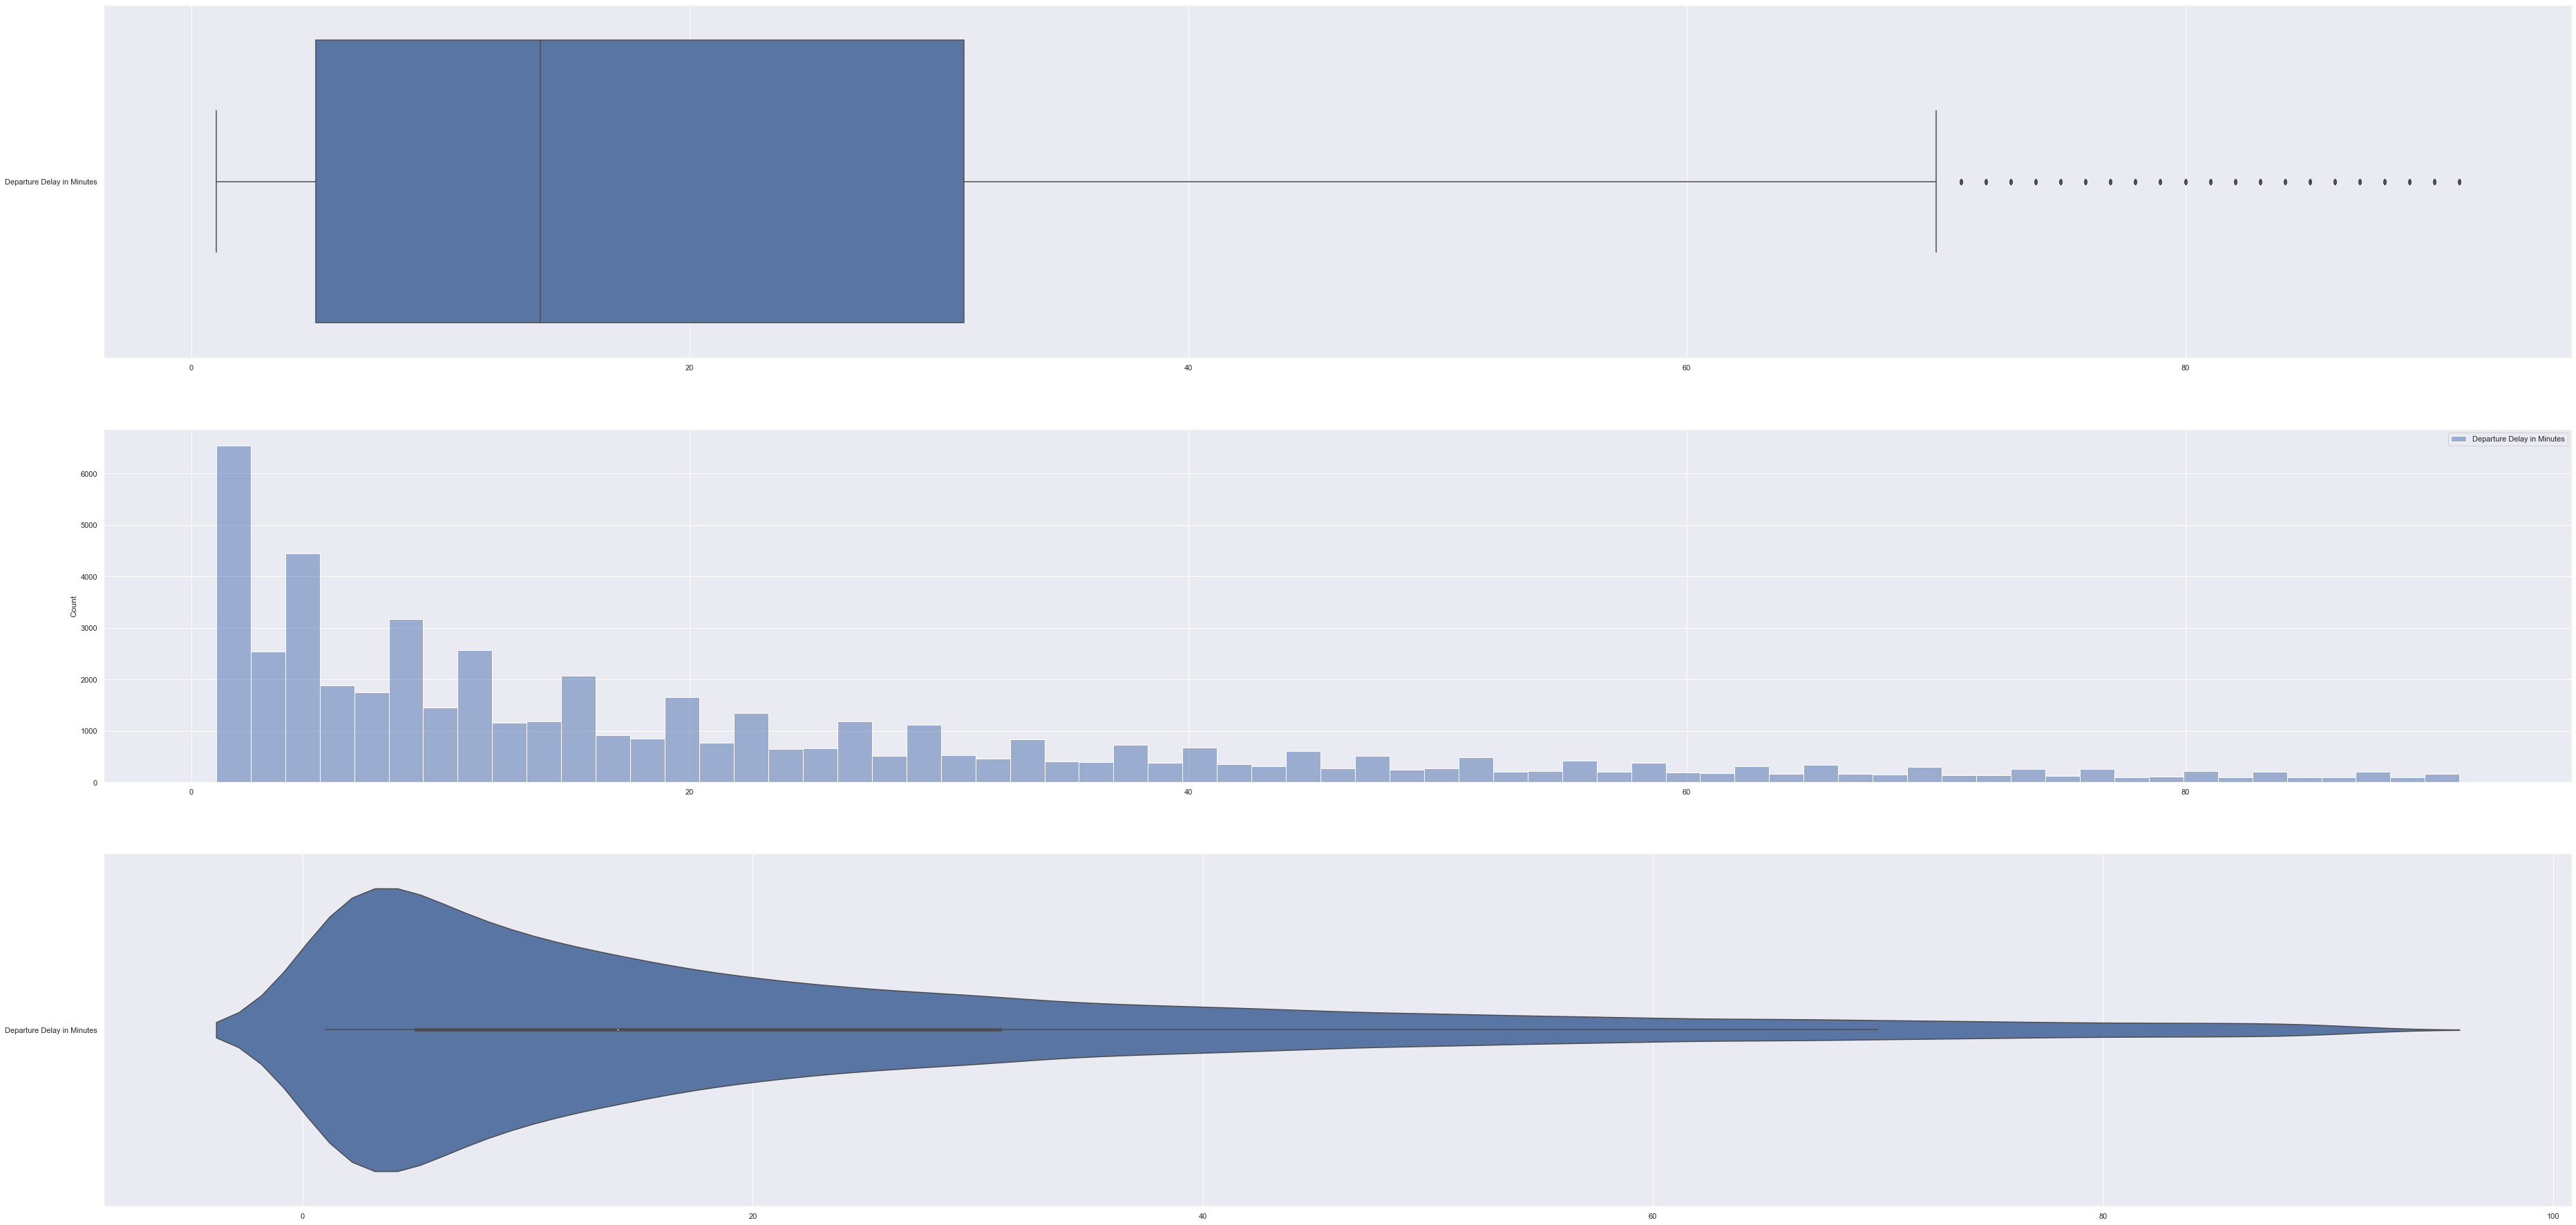

In [53]:
f, axes = plt.subplots(3, 1, figsize=(64, 32))
sb.boxplot(data = departDelayDataClean[['Departure Delay in Minutes']], orient = "h", ax = axes[0])
sb.histplot(data = departDelayDataClean[['Departure Delay in Minutes']], ax = axes[1])
sb.violinplot(data = departDelayDataClean[['Departure Delay in Minutes']], orient = "h", ax = axes[2])

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='satisfaction_v2'>

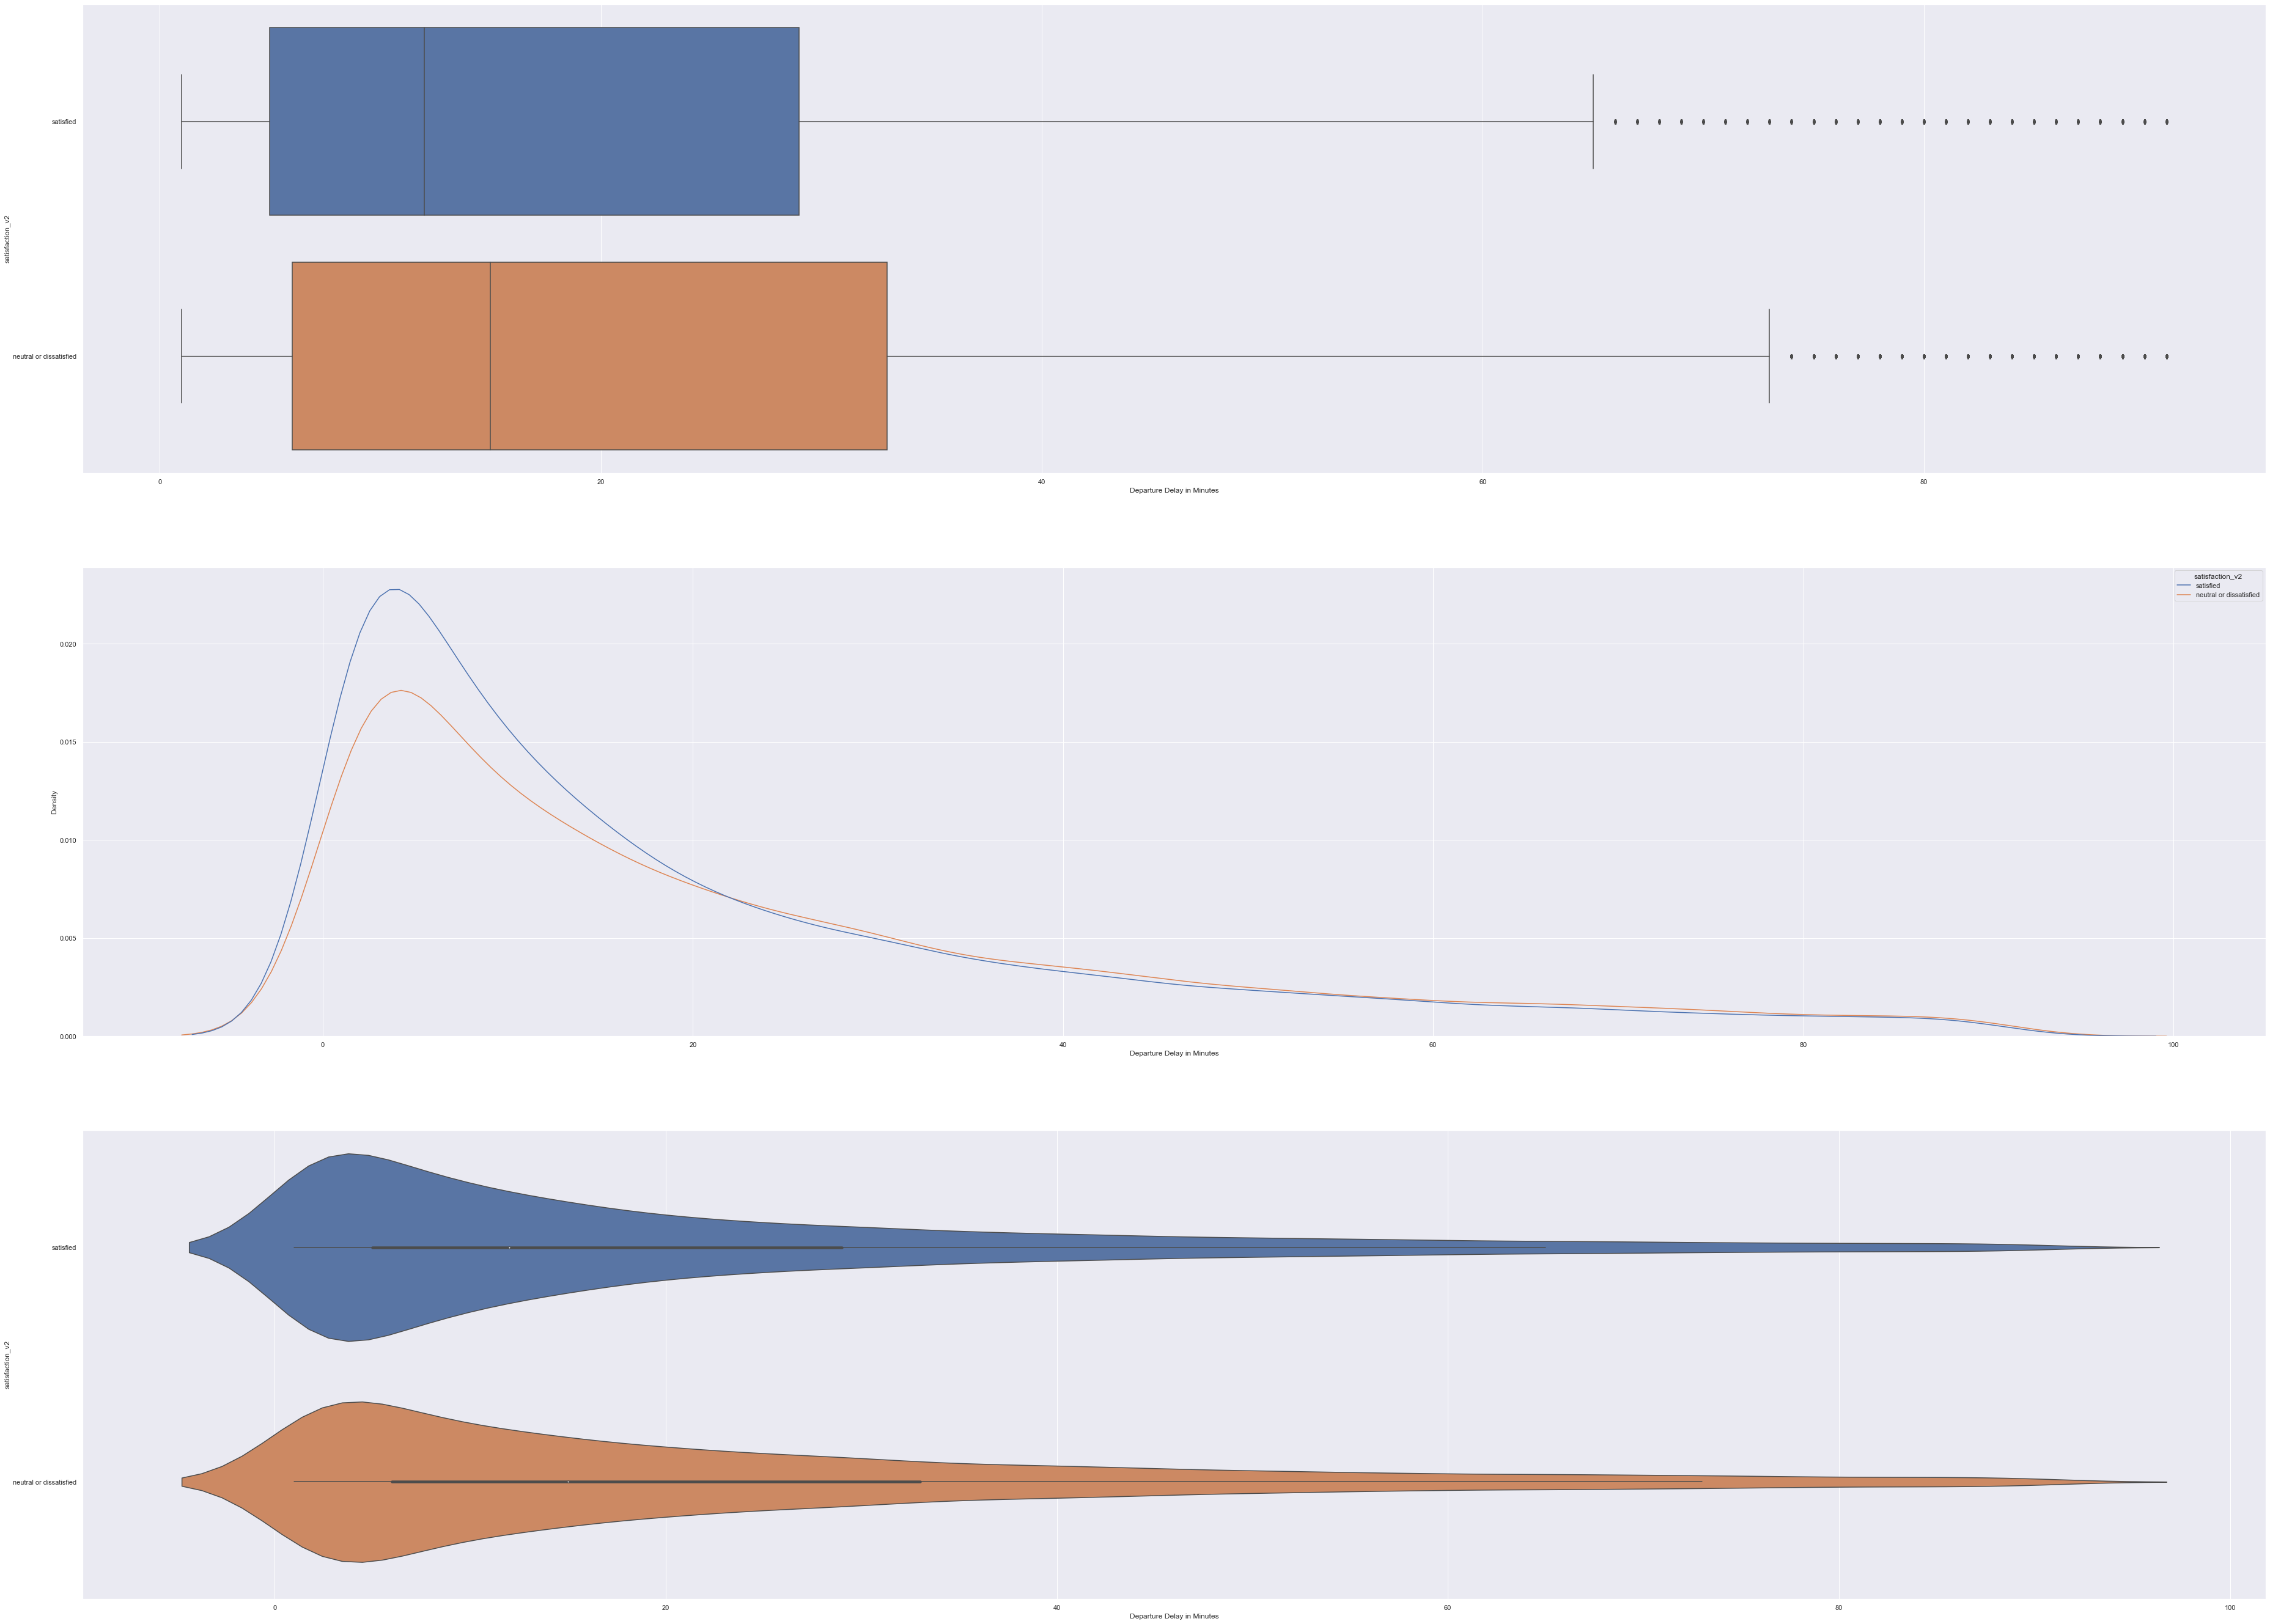

In [54]:
f, axes = plt.subplots(3, 1, figsize=(64, 48))
sb.boxplot(data = departDelayDataClean, orient = "h",
           x ='Departure Delay in Minutes', y = 'satisfaction_v2', ax = axes[0])
sb.kdeplot(data = departDelayDataClean, 
           x='Departure Delay in Minutes', hue='satisfaction_v2', ax = axes[1])
sb.violinplot(data = departDelayDataClean, orient = "h",
               x ='Departure Delay in Minutes', y = 'satisfaction_v2', ax = axes[2])

<a id="arrival-delay-ea"></a>
<div class="alert alert-block alert-info">
    <b>Arrival Delay in Minutes (Numeric)</b><br>
    We excluded <code>0</code> departure delays<br>
    <br><br><a href="#other-variables-ea">Return</a>
</div>

In [55]:
arriveDelayData = satisfactionData.loc[~((satisfactionData['Arrival Delay in Minutes'] == 0))]
arriveDelayData['Arrival Delay in Minutes'].describe()

count    56734.000000
mean        34.443279
std         52.062016
min          1.000000
25%          6.000000
50%         17.000000
75%         41.000000
max       1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [56]:
arriveDelayDataClean = arriveDelayData[['Arrival Delay in Minutes','satisfaction_v2']].copy()
# Calculate the quartiles
adQ1 = arriveDelayDataClean.quantile(0.25)
adQ3 = arriveDelayDataClean.quantile(0.75)
# Rule to identify outliers
adrule = ((arriveDelayDataClean < (adQ1 - 1.5 * (adQ3 - adQ1))) 
        | (arriveDelayDataClean > (adQ3 + 1.5 * (adQ3 - adQ1))))
arriveDelayOutliers = adrule.any(axis = 1)
arriveDelayOutlierindices = arriveDelayOutliers.index[arriveDelayOutliers == True]

# Remove the outliers based on the row indices obtained above
arriveDelayDataClean.drop(axis = 0,               # 0 drops row 1 drops column
                          index = arriveDelayOutlierindices, # this takes a list as input
                          inplace = True)         # not overwritten by default 
# Check the clean data
arriveDelayDataClean['Arrival Delay in Minutes'].describe()

C:\Users\chenn\AppData\Local\Temp/ipykernel_6472/2201753369.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  adrule = ((arriveDelayDataClean < (adQ1 - 1.5 * (adQ3 - adQ1)))
C:\Users\chenn\AppData\Local\Temp/ipykernel_6472/2201753369.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  | (arriveDelayDataClean > (adQ3 + 1.5 * (adQ3 - adQ1))))


count    51773.000000
mean        22.023255
std         21.393201
min          1.000000
25%          6.000000
50%         14.000000
75%         32.000000
max         93.000000
Name: Arrival Delay in Minutes, dtype: float64

<AxesSubplot:>

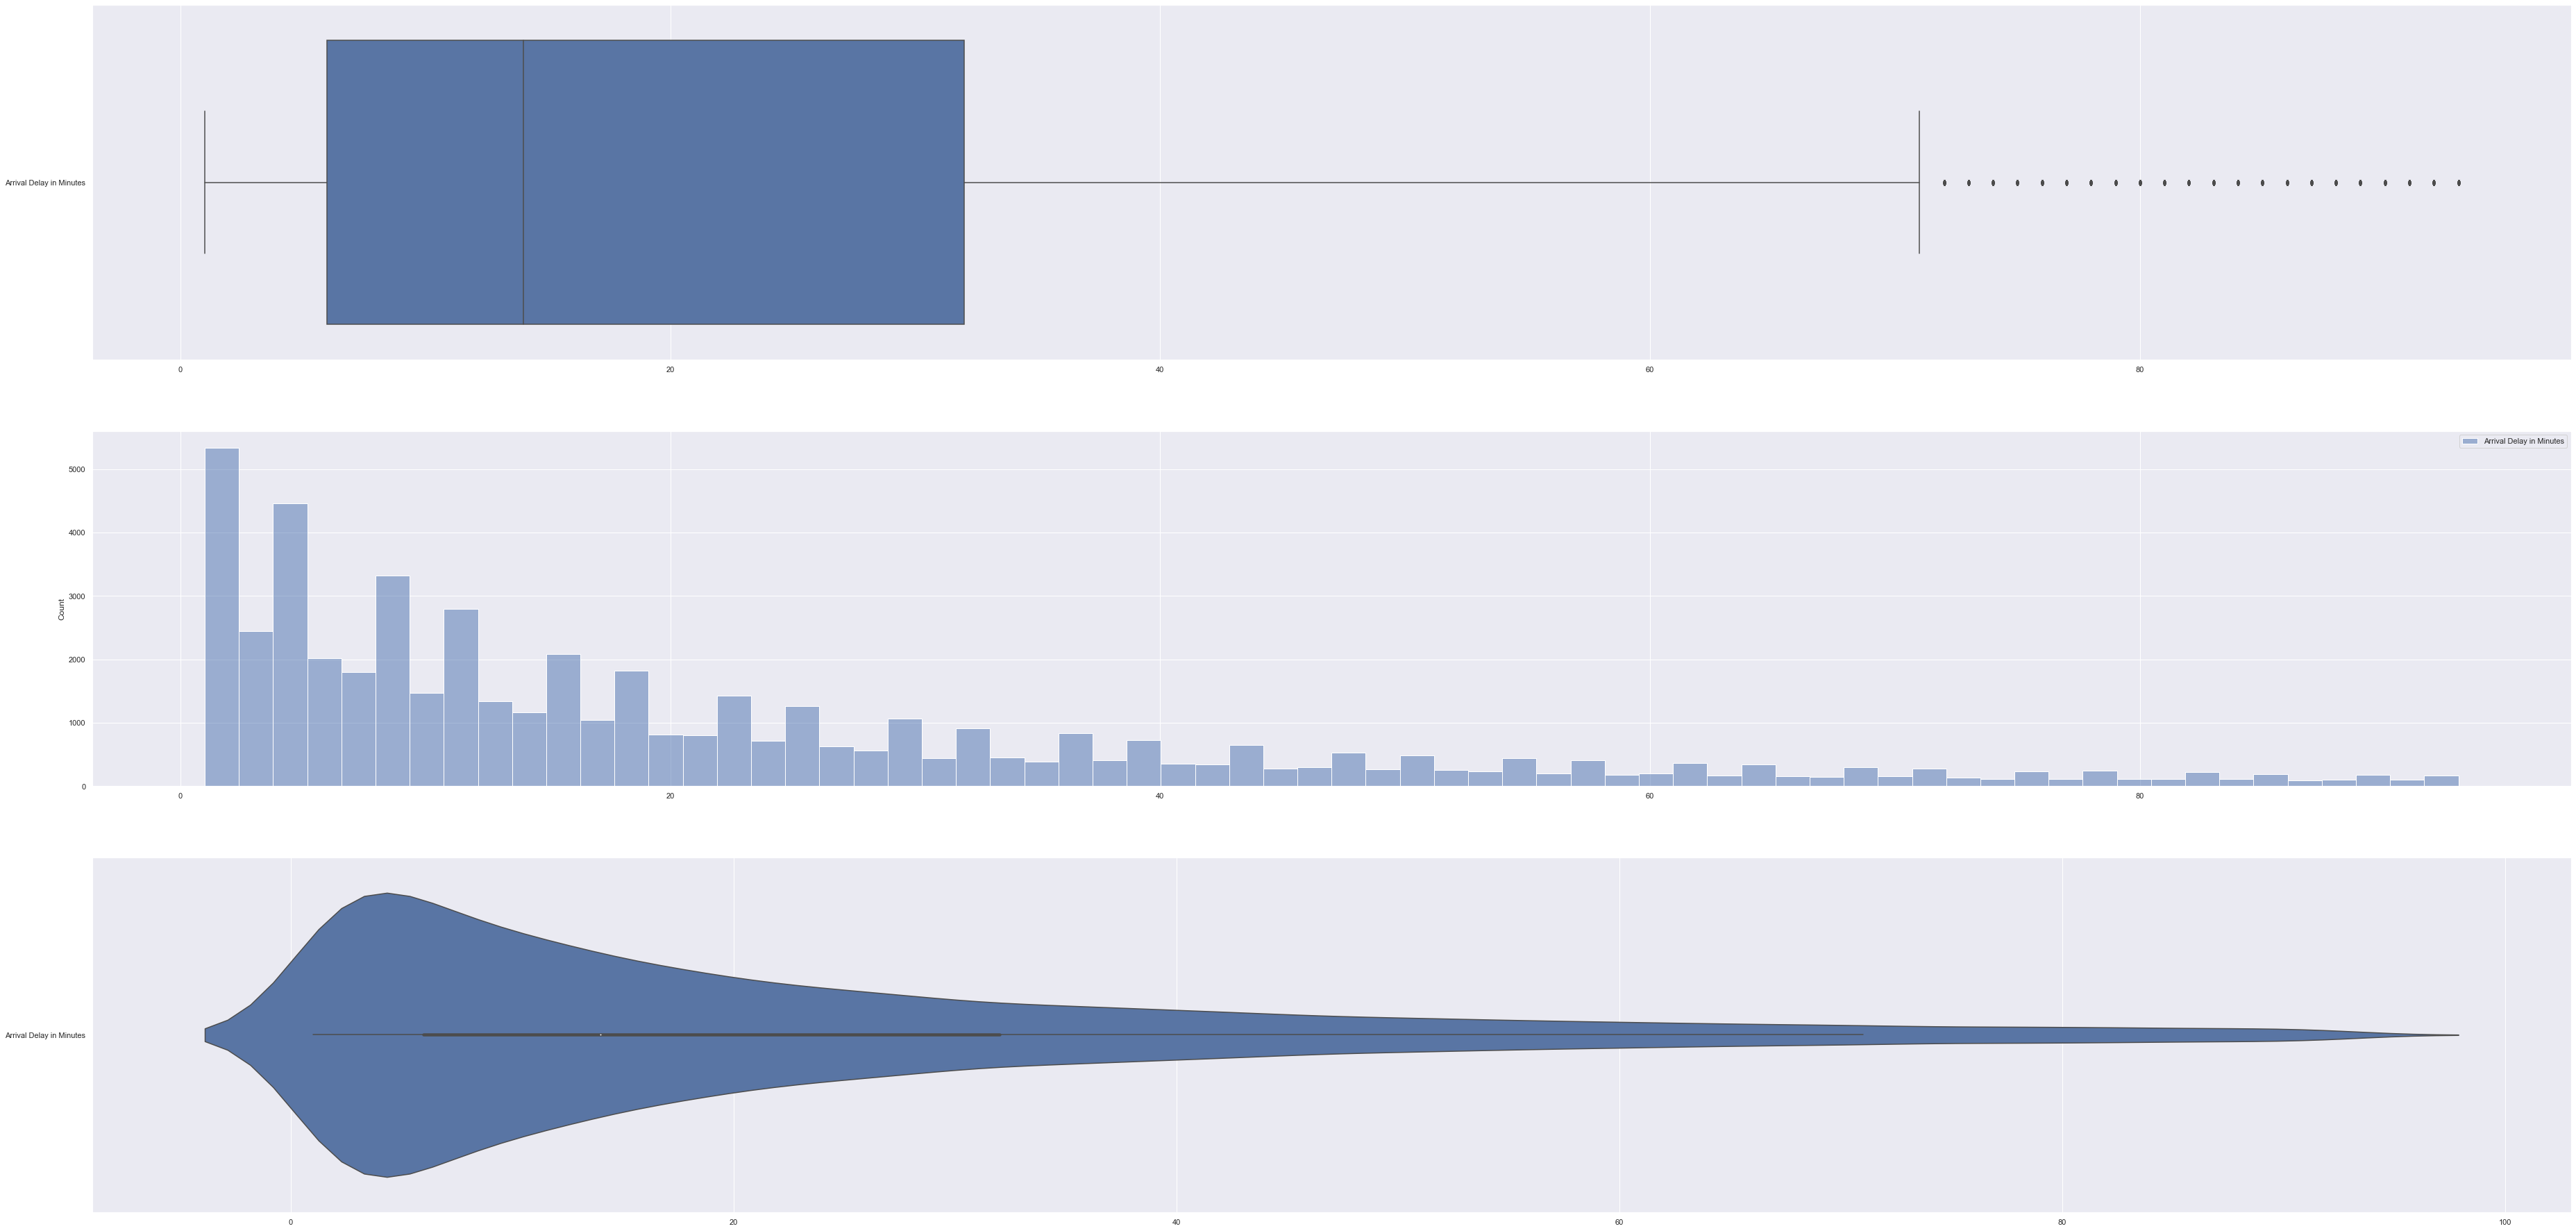

In [57]:
f, axes = plt.subplots(3, 1, figsize=(64, 32))
sb.boxplot(data = arriveDelayDataClean[['Arrival Delay in Minutes']], orient = "h", ax = axes[0])
sb.histplot(data = arriveDelayDataClean[['Arrival Delay in Minutes']], ax = axes[1])
sb.violinplot(data = arriveDelayDataClean[['Arrival Delay in Minutes']], orient = "h", ax = axes[2])

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='satisfaction_v2'>

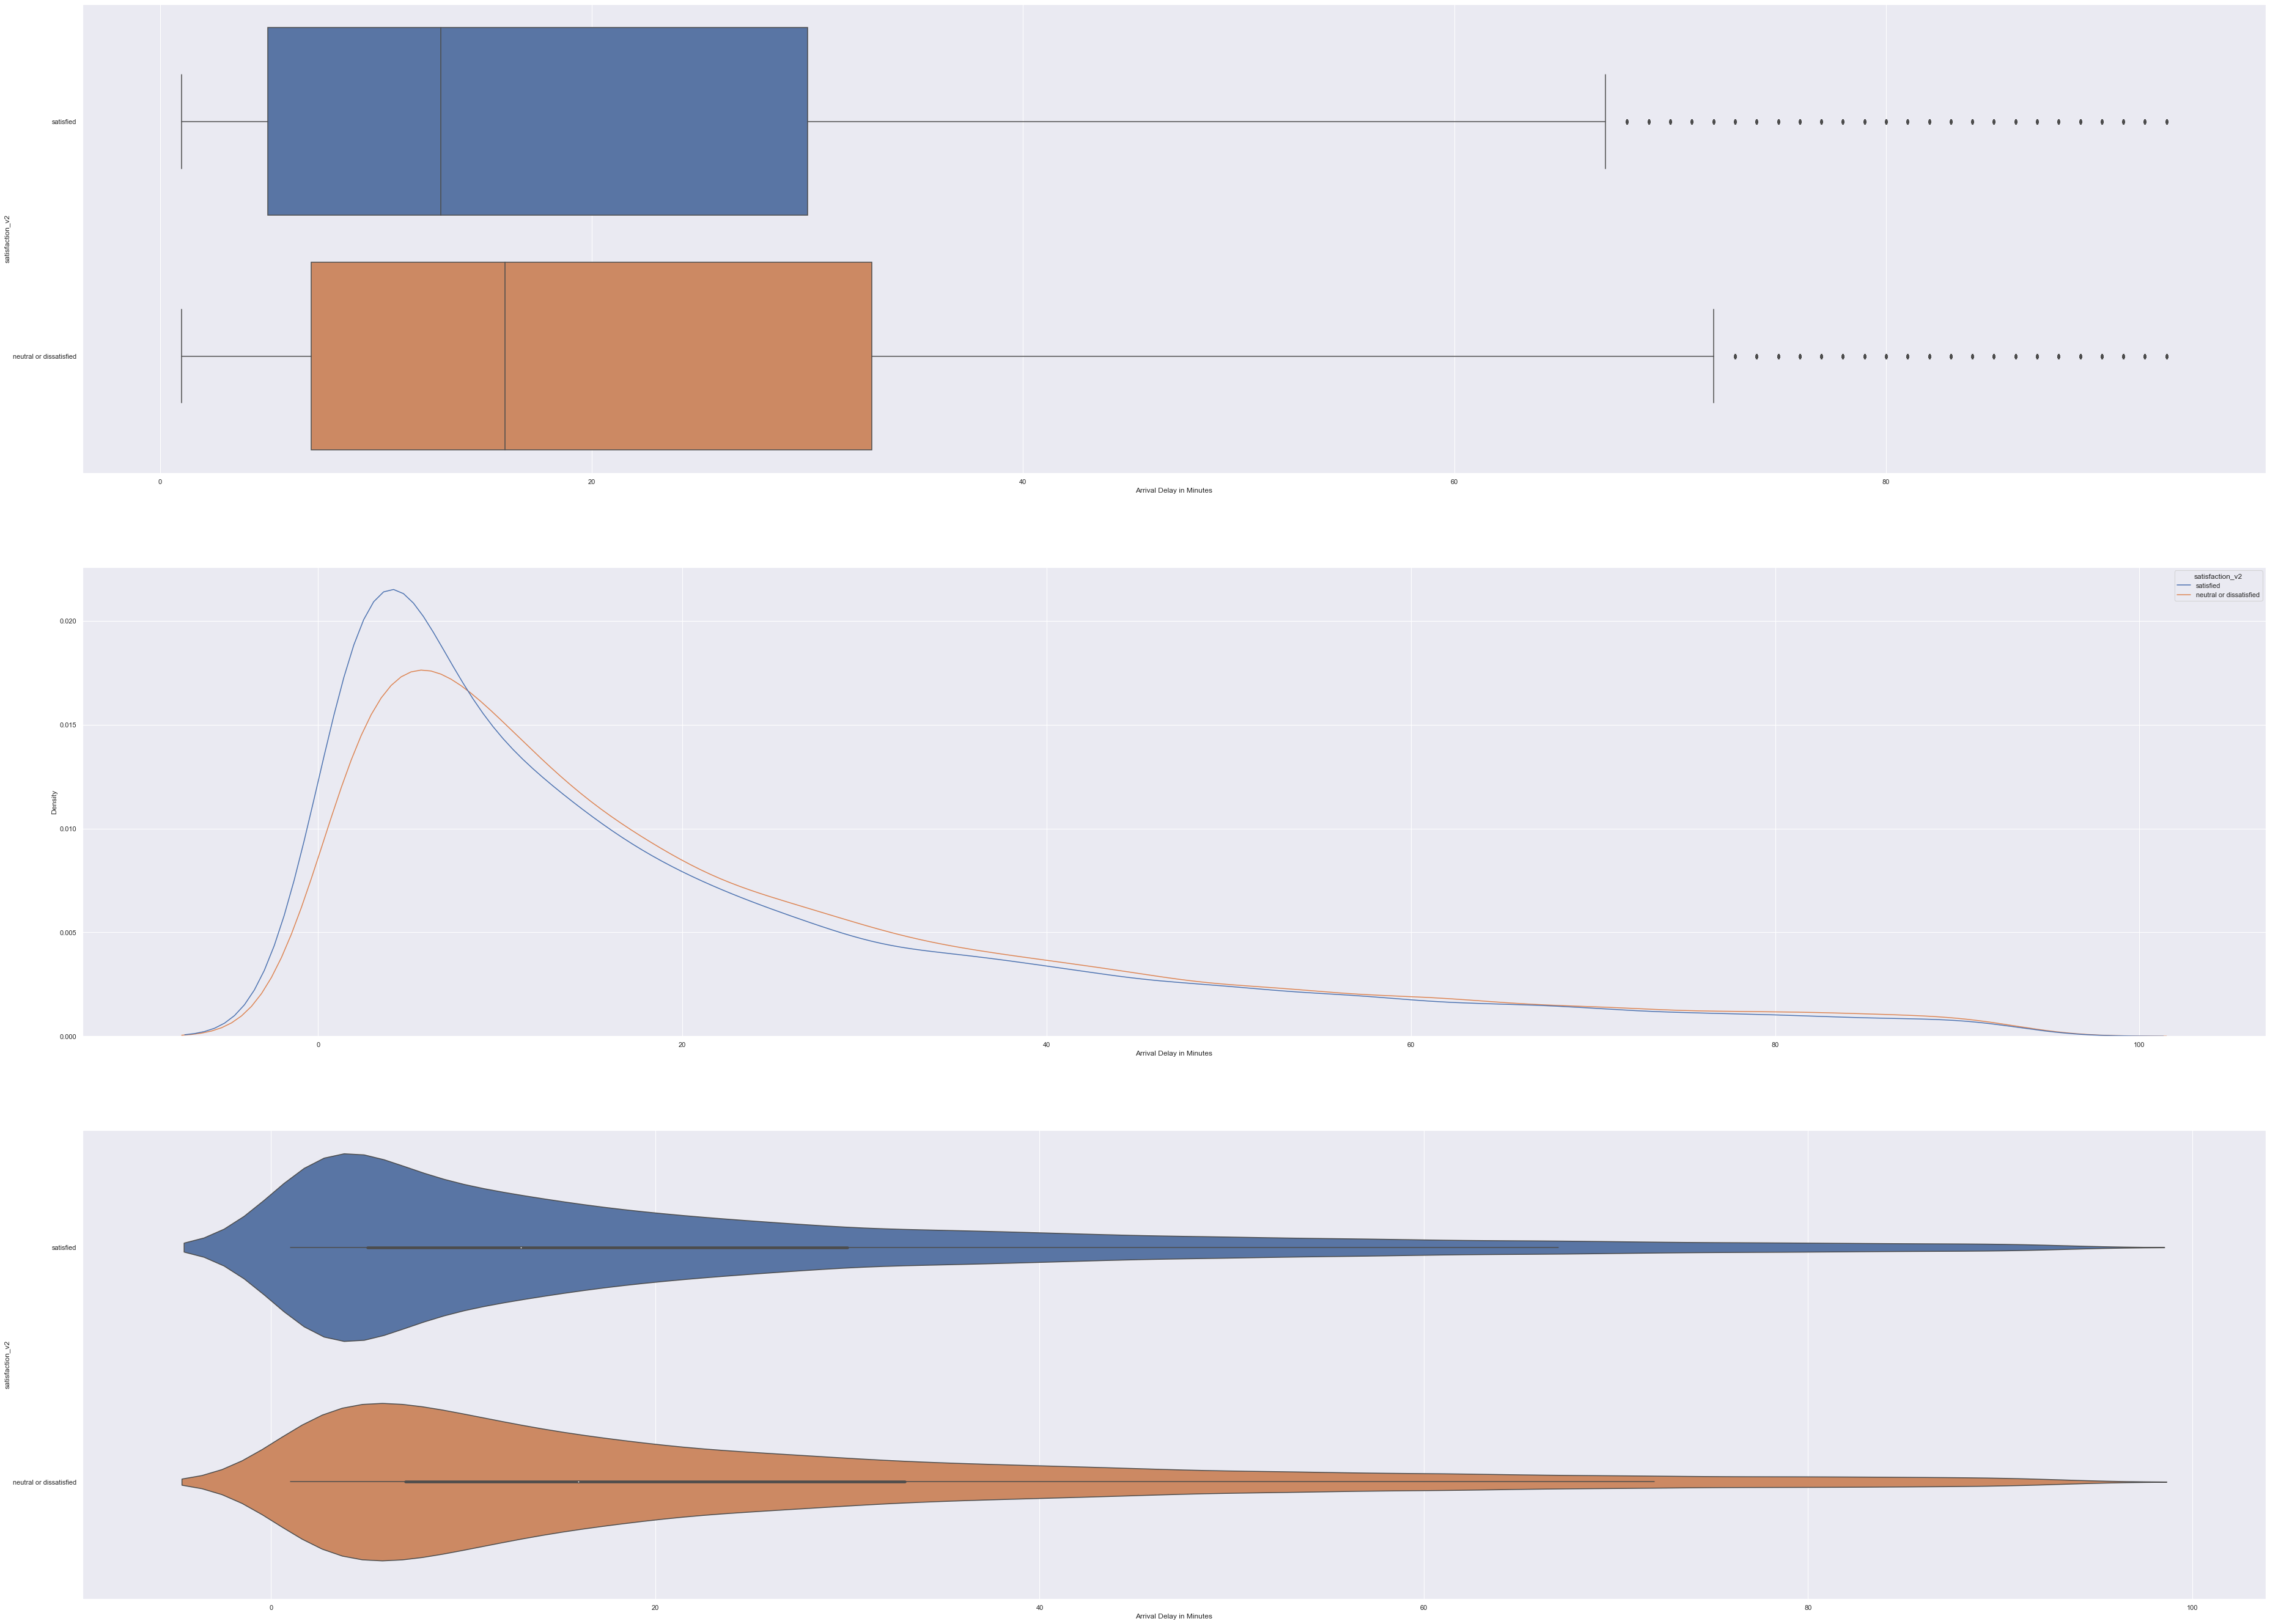

In [58]:
f, axes = plt.subplots(3, 1, figsize=(64, 48))
sb.boxplot(data = arriveDelayDataClean, orient = "h", ax = axes[0],
          x ='Arrival Delay in Minutes', y = 'satisfaction_v2')
sb.kdeplot(data = arriveDelayDataClean, ax = axes[1],
          x ='Arrival Delay in Minutes', hue = 'satisfaction_v2')
sb.violinplot(data = arriveDelayDataClean, orient = "h", ax = axes[2],
          x ='Arrival Delay in Minutes', y = 'satisfaction_v2')

---

<a id="models"></a>
## Models
### Creating a Model for satisfaction_v2 : Attempt 1 - Multi-Variate Classification Tree

In [59]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
satisfactionData_cat = satisfactionData[['Class']]
ohe.fit(satisfactionData_cat)
satisfactionData_cat_ohe = pd.DataFrame(ohe.transform(satisfactionData_cat).toarray(), 
                                  columns=ohe.get_feature_names(satisfactionData_cat.columns))

# Check the encoded variables
satisfactionData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Class_Business  129880 non-null  float64
 1   Class_Eco       129880 non-null  float64
 2   Class_Eco Plus  129880 non-null  float64
dtypes: float64(3)
memory usage: 3.0 MB


In [60]:
# Combining Ordinal Category variables with the OHE Categorical variables
'''
list of columns 
['Seat comfort','Food and drink','Inflight wifi service','Inflight entertainment',
'On-board service','Leg room service', 'Checkin service','Cleanliness']

'''
satisfactionData_num = satisfactionData[['Seat comfort','Food and drink',
'Inflight wifi service','Inflight entertainment','On-board service','Leg room service',
'Checkin service','Cleanliness']]
satisfactionData_res = satisfactionData['satisfaction_v2']
satisfactionData_ohe = pd.concat([satisfactionData_num, satisfactionData_cat_ohe, satisfactionData_res], 
                           sort = False, axis = 1).reindex(index=satisfactionData_num.index)

# Check the final dataframe
satisfactionData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Seat comfort            129880 non-null  int64  
 1   Food and drink          129880 non-null  int64  
 2   Inflight wifi service   129880 non-null  int64  
 3   Inflight entertainment  129880 non-null  int64  
 4   On-board service        129880 non-null  int64  
 5   Leg room service        129880 non-null  int64  
 6   Checkin service         129880 non-null  int64  
 7   Cleanliness             129880 non-null  int64  
 8   Class_Business          129880 non-null  float64
 9   Class_Eco               129880 non-null  float64
 10  Class_Eco Plus          129880 non-null  float64
 11  satisfaction_v2         129880 non-null  object 
dtypes: float64(3), int64(8), object(1)
memory usage: 11.9+ MB


### Create and Fit the Model

[Text(669.6, 1141.5600000000002, 'Inflight entertainment <= 3.5\ngini = 0.495\nsamples = 103904\nvalue = [46959, 56945]\nclass = satisfied'),
 Text(334.8, 815.4000000000001, 'Seat comfort <= 3.5\ngini = 0.339\nsamples = 46495\nvalue = [36445, 10050]\nclass = neutral or dissatisfied'),
 Text(167.4, 489.24, 'Seat comfort <= 0.5\ngini = 0.247\nsamples = 40649\nvalue = [34768, 5881]\nclass = neutral or dissatisfied'),
 Text(83.7, 163.07999999999993, 'gini = 0.008\nsamples = 2124\nvalue = [8, 2116]\nclass = satisfied'),
 Text(251.10000000000002, 163.07999999999993, 'gini = 0.176\nsamples = 38525\nvalue = [34760, 3765]\nclass = neutral or dissatisfied'),
 Text(502.20000000000005, 489.24, 'Seat comfort <= 4.5\ngini = 0.409\nsamples = 5846\nvalue = [1677, 4169]\nclass = satisfied'),
 Text(418.5, 163.07999999999993, 'gini = 0.489\nsamples = 3851\nvalue = [1643, 2208]\nclass = satisfied'),
 Text(585.9, 163.07999999999993, 'gini = 0.034\nsamples = 1995\nvalue = [34, 1961]\nclass = satisfied'),
 T

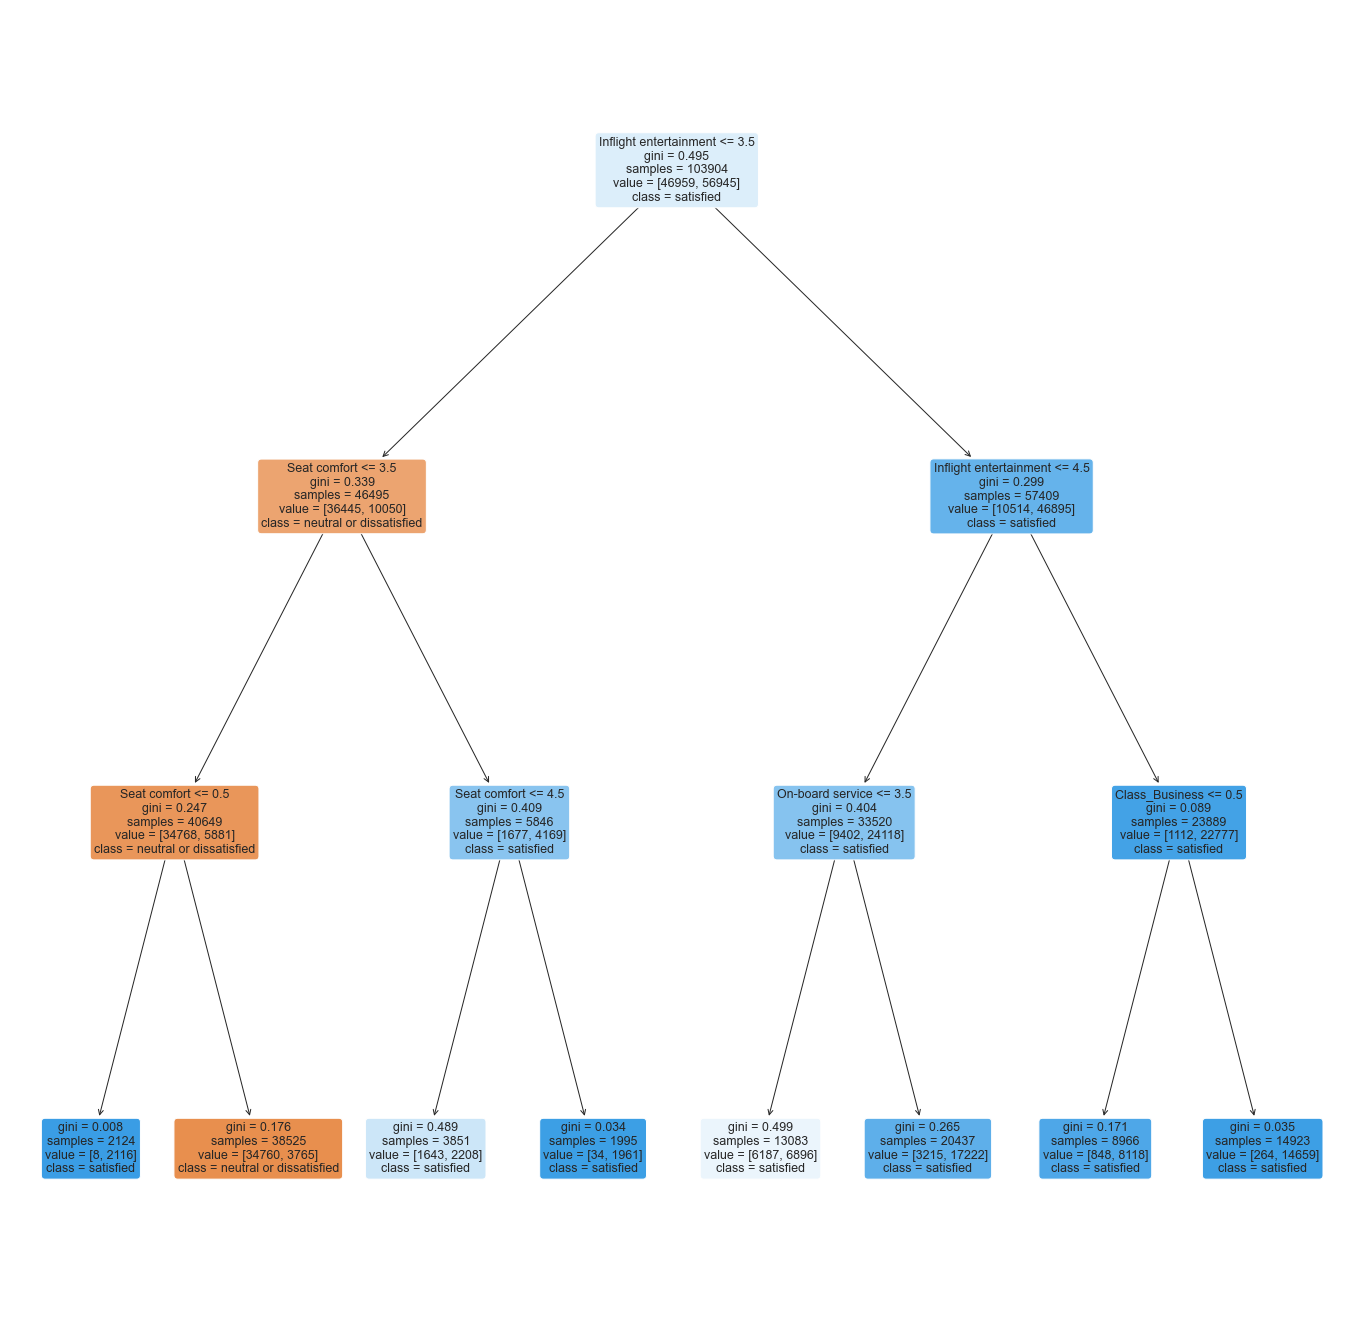

In [61]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(satisfactionData_ohe['satisfaction_v2'])
X = pd.DataFrame(satisfactionData_ohe.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["neutral or dissatisfied","satisfied"])

### Check the accuracy of the Model

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

Train Data
Accuracy  :	 0.8463581767785648

TPR Train :	 0.9338835718675915
TNR Train :	 0.7402201920824549

FPR Train :	 0.25977980791754507
FNR Train :	 0.06611642813240846


<AxesSubplot:>

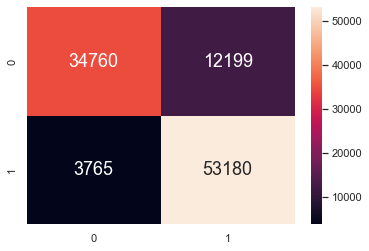

In [62]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8444333230674469

TPR Test :	 0.932399943430915
TNR Test :	 0.7393104613824574

FPR Test :	 0.2606895386175427
FNR Test :	 0.06760005656908499


<AxesSubplot:>

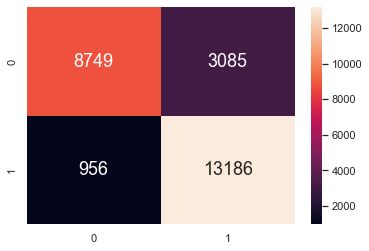

In [63]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Create a Model for satisfaction_v2 : Attempt 2 - Resampling

In [64]:
# Upsample Bad to match Good
from sklearn.utils import resample
satisfactionBad = satisfactionData_ohe[satisfactionData_ohe.satisfaction_v2 == 'neutral or dissatisfied']
satisfactionGood = satisfactionData_ohe[satisfactionData_ohe.satisfaction_v2 == 'satisfied']
 
# Upsample the Bad samples
satisfactionBad_up = resample(satisfactionBad, 
                        replace=True,                     # sample with replacement
                        n_samples=satisfactionGood.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
satisfactionData_ohe_up = pd.concat([satisfactionGood, satisfactionBad_up])
 
# Check the ratio of the classes
satisfactionData_ohe_up['satisfaction_v2'].value_counts()

satisfied                  71087
neutral or dissatisfied    71087
Name: satisfaction_v2, dtype: int64

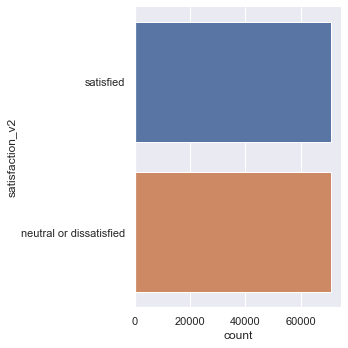

In [65]:
# Quick plot to check the balanced classes visually
sb.catplot(y = 'satisfaction_v2', data = satisfactionData_ohe_up, kind = "count")

In [66]:
# Confirm that the OHE is still in place
# and that the samples have now increased
satisfactionData_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142174 entries, 0 to 84898
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Seat comfort            142174 non-null  int64  
 1   Food and drink          142174 non-null  int64  
 2   Inflight wifi service   142174 non-null  int64  
 3   Inflight entertainment  142174 non-null  int64  
 4   On-board service        142174 non-null  int64  
 5   Leg room service        142174 non-null  int64  
 6   Checkin service         142174 non-null  int64  
 7   Cleanliness             142174 non-null  int64  
 8   Class_Business          142174 non-null  float64
 9   Class_Eco               142174 non-null  float64
 10  Class_Eco Plus          142174 non-null  float64
 11  satisfaction_v2         142174 non-null  object 
dtypes: float64(3), int64(8), object(1)
memory usage: 18.1+ MB


### Create and Fit the Model

[Text(669.6, 1174.1760000000002, 'Inflight entertainment <= 3.5\ngini = 0.5\nsamples = 113739\nvalue = [56791, 56948]\nclass = satisfied'),
 Text(334.8, 913.248, 'Seat comfort <= 3.5\ngini = 0.303\nsamples = 54244\nvalue = [44146, 10098]\nclass = neutral or dissatisfied'),
 Text(167.4, 652.3200000000002, 'Seat comfort <= 0.5\ngini = 0.216\nsamples = 48122\nvalue = [42180, 5942]\nclass = neutral or dissatisfied'),
 Text(83.7, 391.39200000000005, 'Food and drink <= 2.0\ngini = 0.007\nsamples = 2135\nvalue = [8, 2127]\nclass = satisfied'),
 Text(41.85, 130.46400000000017, 'gini = 0.001\nsamples = 2128\nvalue = [1, 2127]\nclass = satisfied'),
 Text(125.55000000000001, 130.46400000000017, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = neutral or dissatisfied'),
 Text(251.10000000000002, 391.39200000000005, 'Class_Business <= 0.5\ngini = 0.152\nsamples = 45987\nvalue = [42172, 3815]\nclass = neutral or dissatisfied'),
 Text(209.25, 130.46400000000017, 'gini = 0.08\nsamples = 31174\nvalue 

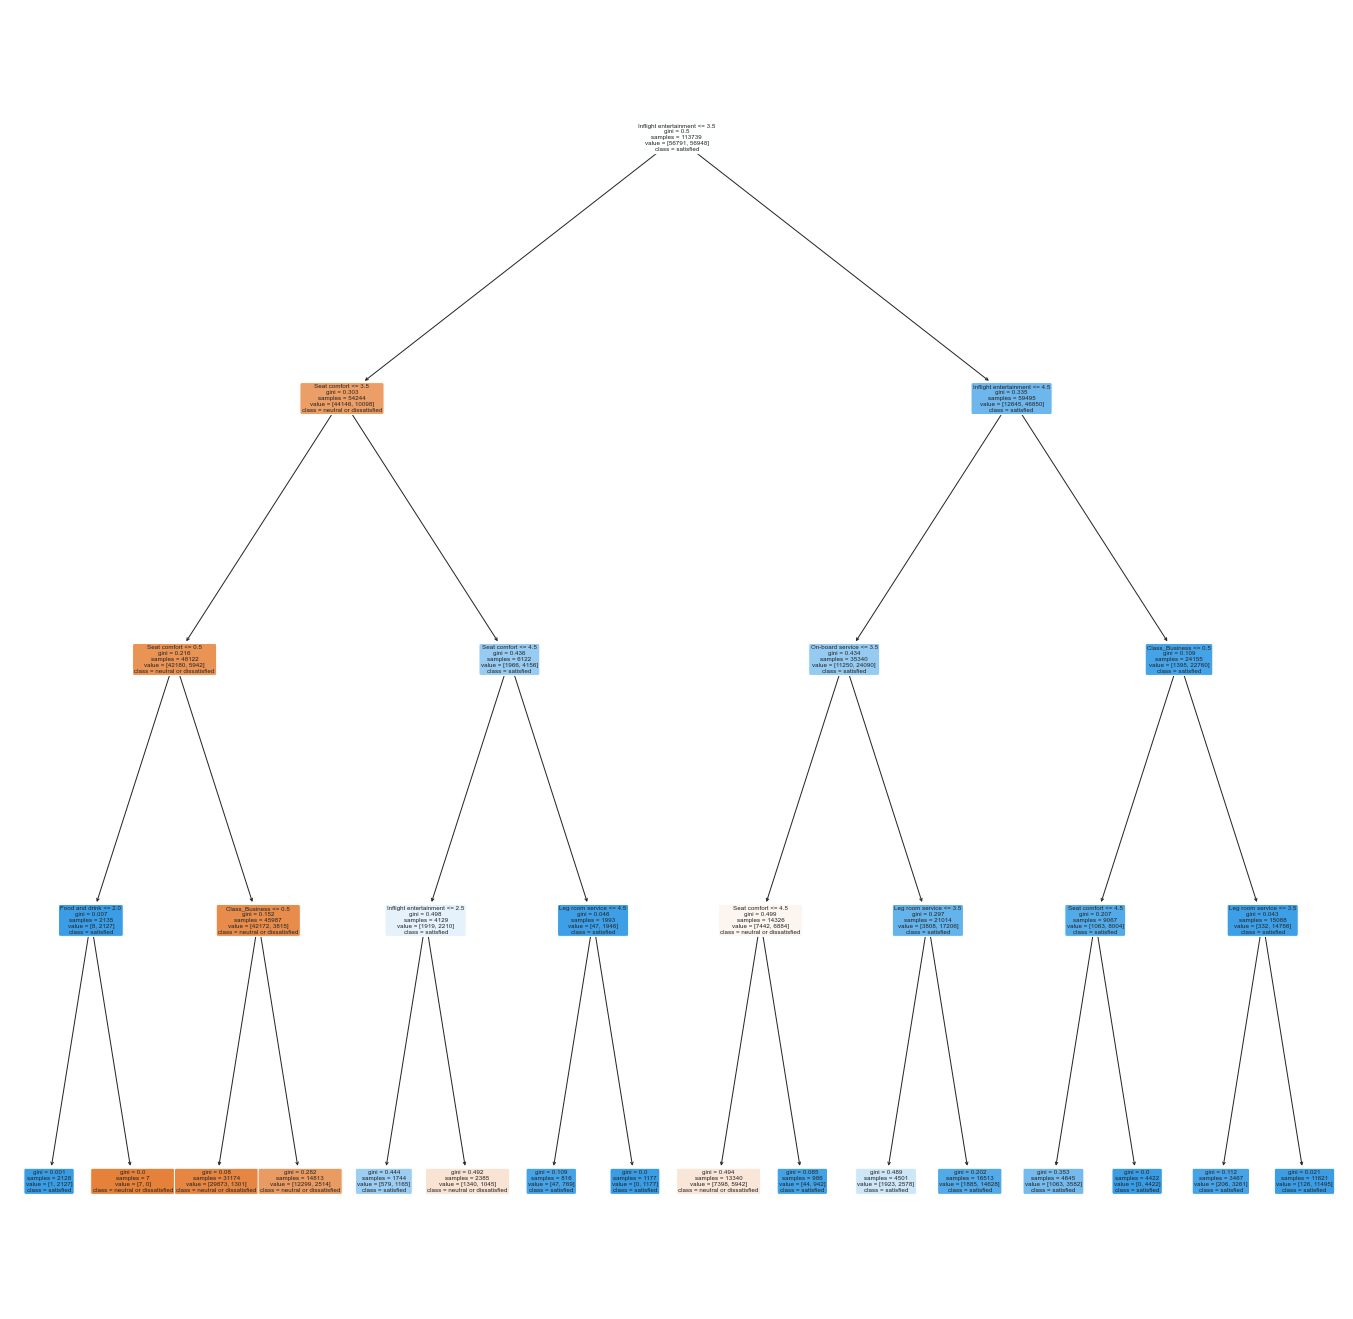

In [67]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(satisfactionData_ohe_up['satisfaction_v2'])
X = pd.DataFrame(satisfactionData_ohe_up.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["neutral or dissatisfied","satisfied"])

#### Check the accuracy of the Model

Train Data
Accuracy  :	 0.8533836239108837

TPR Train :	 0.8103181850108871
TNR Train :	 0.8965681181877411

FPR Train :	 0.10343188181225899
FNR Train :	 0.18968181498911288


<AxesSubplot:>

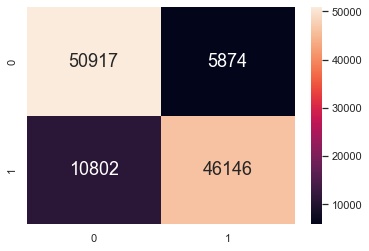

In [68]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8551784772287674

TPR Test :	 0.810594808685197
TNR Test :	 0.8992725237828764

FPR Test :	 0.10072747621712368
FNR Test :	 0.18940519131480302


<AxesSubplot:>

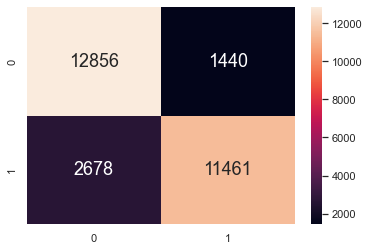

In [69]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Create a Model for satisfaction_v2 : Attempt 3 - Random Forest

In [70]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(satisfactionData_ohe_up['satisfaction_v2'])
X = pd.DataFrame(satisfactionData_ohe_up.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [71]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.satisfaction_v2.ravel())

RandomForestClassifier(max_depth=4)

Train Data
Accuracy  :	 0.8667299694915552

TPR Train :	 0.8711621939860459
TNR Train :	 0.8622928322601077

FPR Train :	 0.13770716773989233
FNR Train :	 0.12883780601395406


<AxesSubplot:>

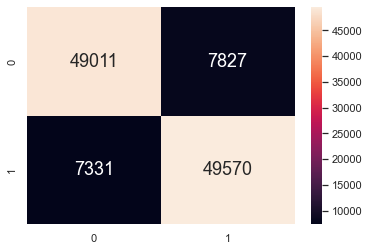

In [72]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8666432213820995

TPR Test :	 0.8720569575637953
TNR Test :	 0.8612534212927223

FPR Test :	 0.1387465787072777
FNR Test :	 0.12794304243620472


<AxesSubplot:>

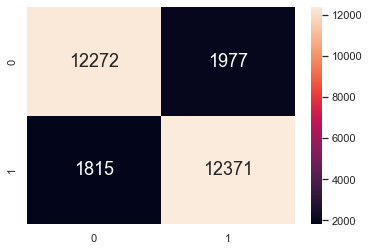

In [73]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [74]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(satisfactionData_ohe_up['satisfaction_v2'])
X = pd.DataFrame(satisfactionData_ohe_up.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # CHANGE AND EXPERIMENT
                                 max_depth = 4)       # CHANGE AND EXPERIMENT

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.satisfaction_v2.ravel())

RandomForestClassifier(max_depth=4, n_estimators=1000)

Train Data
Accuracy  :	 0.8679872339303142

TPR Train :	 0.8684145827479629
TNR Train :	 0.8675587639757021

FPR Train :	 0.13244123602429791
FNR Train :	 0.1315854172520371


<AxesSubplot:>

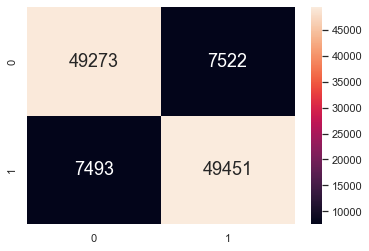

In [75]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8694918234570073

TPR Test :	 0.8682740578377997
TNR Test :	 0.8706968933669186

FPR Test :	 0.12930310663308145
FNR Test :	 0.13172594216220038


<AxesSubplot:>

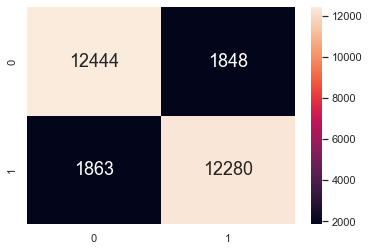

In [76]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### Increase the Depth of Decision Trees in the Forest

In [77]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(satisfactionData_ohe_up['satisfaction_v2'])
X = pd.DataFrame(satisfactionData_ohe_up.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # CHANGE AND EXPERIMENT
                                 max_depth = 10)       # CHANGE AND EXPERIMENT

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.satisfaction_v2.ravel())

RandomForestClassifier(max_depth=10)

Train Data
Accuracy  :	 0.915622609658956

TPR Train :	 0.9060123302829642
TNR Train :	 0.9252543745379009

FPR Train :	 0.07474562546209908
FNR Train :	 0.09398766971703582


<AxesSubplot:>

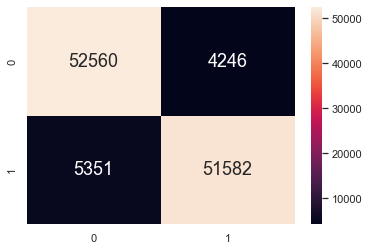

In [78]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9108844733602954

TPR Test :	 0.8994630493146814
TNR Test :	 0.9222043274280513

FPR Test :	 0.07779567257194875
FNR Test :	 0.10053695068531864


<AxesSubplot:>

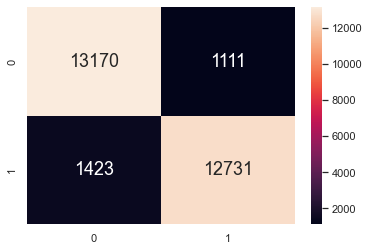

In [79]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### Increase both Number and Depth of Decision Trees in the Forest

In [80]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(satisfactionData_ohe_up['satisfaction_v2'])
X = pd.DataFrame(satisfactionData_ohe_up.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # CHANGE AND EXPERIMENT
                                 max_depth = 10)       # CHANGE AND EXPERIMENT

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.satisfaction_v2.ravel())

RandomForestClassifier(max_depth=10, n_estimators=1000)

Train Data
Accuracy  :	 0.9153324717115501

TPR Train :	 0.9028916171245647
TNR Train :	 0.9277665465412674

FPR Train :	 0.07223345345873253
FNR Train :	 0.09710838287543533


<AxesSubplot:>

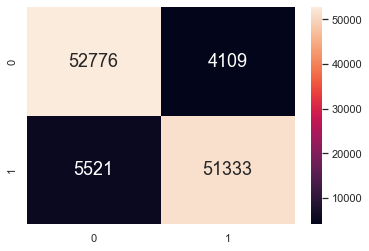

In [81]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9127483734833831

TPR Test :	 0.9016370406801096
TNR Test :	 0.923883960005633

FPR Test :	 0.07611603999436699
FNR Test :	 0.09836295931989039


<AxesSubplot:>

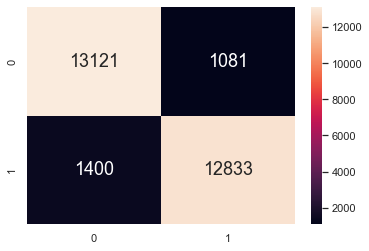

In [82]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Creating a Model for satisfaction_v2 : Attempt 4

In [83]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Extract Response and Predictors
y = pd.DataFrame(satisfactionData_ohe_up['satisfaction_v2'])
X = pd.DataFrame(satisfactionData_ohe_up.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [84]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

#param_grid = {'n_estimators': np.arange(10,101,10),
#              'max_depth': np.arange(2, 4)} 

In [85]:
# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.satisfaction_v2.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [86]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=10, n_estimators=500)
0.9121761073477197


#### Use the Best Model found through GridSearchCV

In [87]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(satisfactionData_ohe_up['satisfaction_v2'])
X = pd.DataFrame(satisfactionData_ohe_up.drop('satisfaction_v2', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 400,   # found using GridSearchCV
                                 max_depth = 10)       # found using GridSearchCV

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.satisfaction_v2.ravel())

RandomForestClassifier(max_depth=10, n_estimators=400)

Train Data
Accuracy  :	 0.9151830067083411

TPR Train :	 0.9034345357734758
TNR Train :	 0.9268690482453833

FPR Train :	 0.07313095175461672
FNR Train :	 0.0965654642265242


<AxesSubplot:>

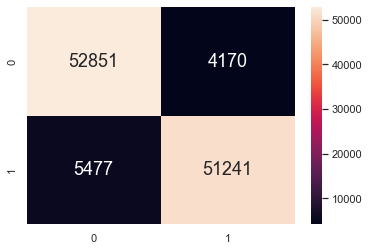

In [88]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9111658167751011

TPR Test :	 0.9015241144129724
TNR Test :	 0.9210152139911845

FPR Test :	 0.07898478600881559
FNR Test :	 0.09847588558702763


<AxesSubplot:>

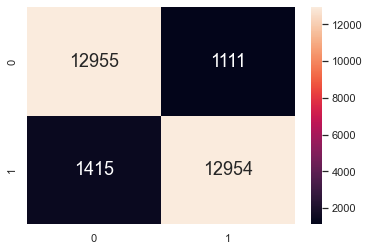

In [89]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Create a Model for satisfaction_v2 : Attempt 5 - Logistic Regression 

In [90]:
col_names = ['id','satisfaction_v2','Gender','Customer Type',
'Age','Type of Travel','Class','Flight Distance',
'Seat comfort','Departure/Arrival time convenient','Food and drink','Gate location','Inflight wifi service',
'Inflight entertainment','Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling',
'Checkin service','Cleanliness','Online boarding','Departure Delay in Minutes','Arrival Delay in Minutes']
# load dataset, remove header
pima = pd.read_csv("satisfaction.csv", header=1, names=col_names)
#pima.head()

In [91]:
# list of columns ['Seat comfort',Food and drink',
#'Inflight wifi service','Inflight entertainment','On-board service','Leg room service',
#'Checkin service','Cleanliness']
feature_cols = ['Seat comfort','Food and drink',
'Inflight wifi service','Inflight entertainment','On-board service','Leg room service',
'Checkin service','Cleanliness']

X = pima[feature_cols] # Features
y = pima.satisfaction_v2 # Target variable

In [92]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [93]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=500) # increase the limit else will get warning

# fit the model with data
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

In [94]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 8890,  2830],
       [ 2465, 11791]], dtype=int64)

In [95]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

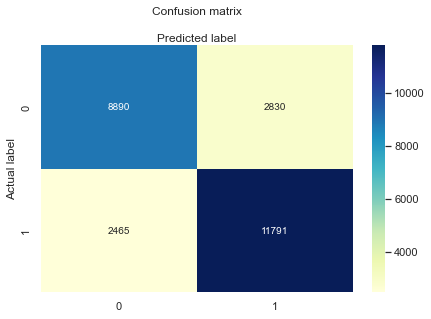

In [96]:
class_names = [0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [97]:
#pos_label='satisfied' will take satisfied as positive else will take 1 as default
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred,pos_label='satisfied'))
print("Recall:", metrics.recall_score(y_test, y_pred,pos_label='satisfied'))

Accuracy: 0.7961579919926086
Precision: 0.8064427877710143
Recall: 0.8270903479236813


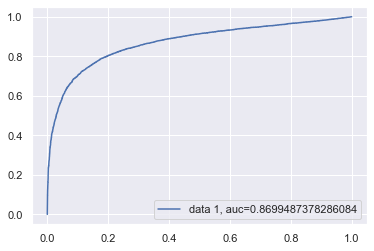

In [98]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label='satisfied')
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Receiver Operating Characteristic(ROC) Curve

A plot for the true positive rate against the false positive rate.

AUC score of ~0.87. Consider good. As 1 represents perfect classifier and 0.5 represents a worthless classifier.

### Conclusion

| # | Attempt 1 | Attempt 2 | Attempt 3 | Attempt 4 |
| --- | --- | --- | --- | --- |
| Accuracy |  0.8444333230674469 | 0.8551784772287674 | 0.9127483734833831 | 0.9111658167751011 | 
| TPR | 0.932399943430915 | 0.810594808685197 |  0.9016370406801096 | 0.9015241144129724 |
| TNR | 0.7393104613824574 | 0.8992725237828764 | 0.923883960005633 | 0.9210152139911845 | 
| FPR | 0.2606895386175427 | 0.10072747621712368 | 0.07611603999436699 | 0.07898478600881559 | 
| FNR | 0.06760005656908499 | 0.18940519131480302 | 0.09836295931989039 | 0.09847588558702763 | 

| # | Attempt 5 | 
| --- | --- |
| Accuracy | 0.7961579919926086 | 
| Precision | 0.8064427877710143 | 
| Recall | 0.8270903479236813 | 
| AUC | 0.8699487378286084 | 

- Attempt 1 & 2 => Multi-Variate Classification Tree
- Attempt 3 & 4 => Random Forest
- Attempt 5 => Logistic Regression

From the models created above, we can conclude that the models created using Random Forest performs better.

As it has a higher accuracy rate, true positive rate and true negative rate. Also with lower false positive rate & false negative rate.